(4500, 8, 100)
0
0


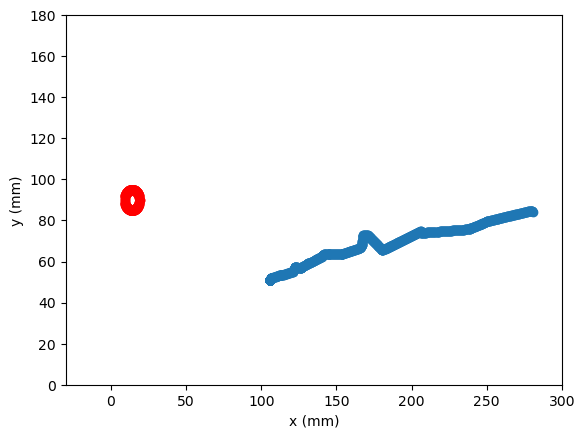

1
0


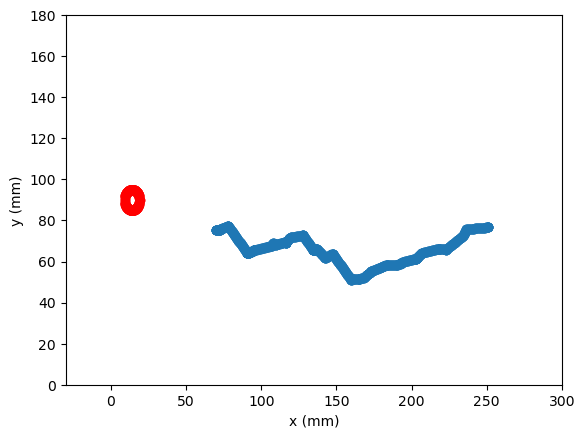

2
0


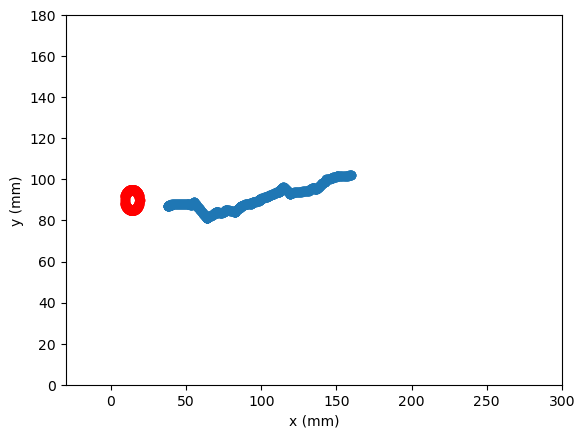

3
0


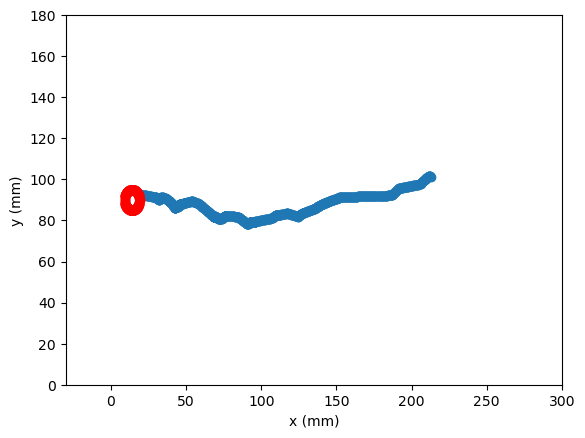

4
0


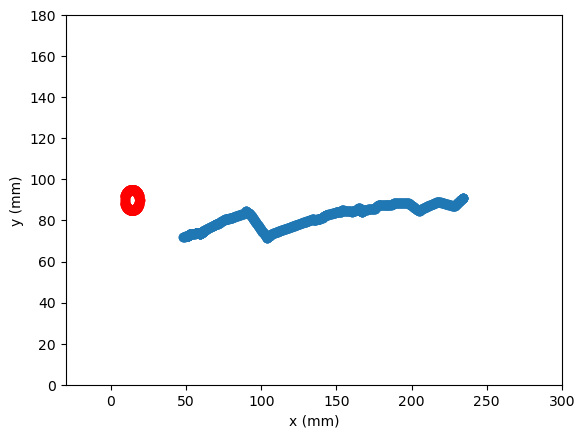

5
0


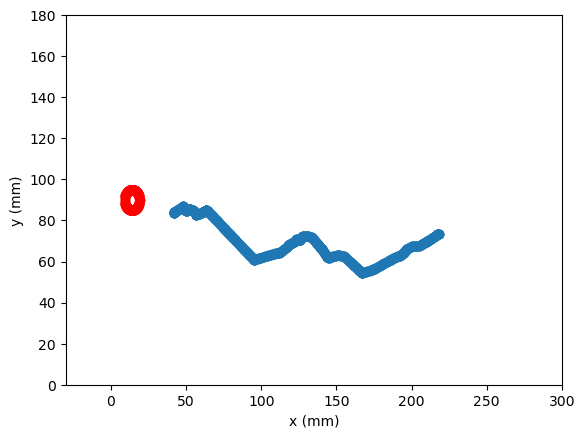

6
0


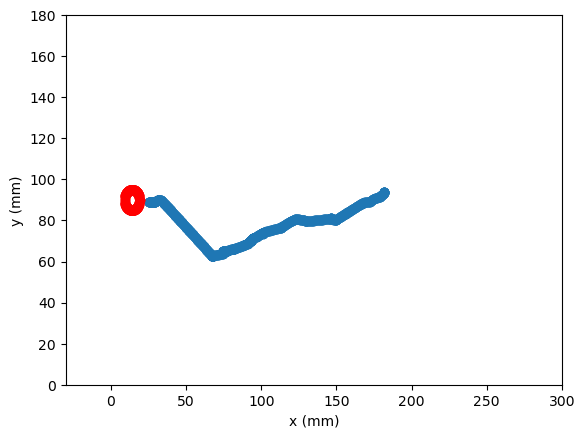

7
0


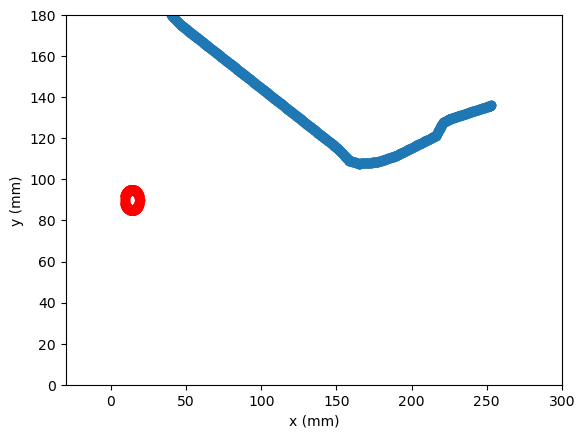

8
0


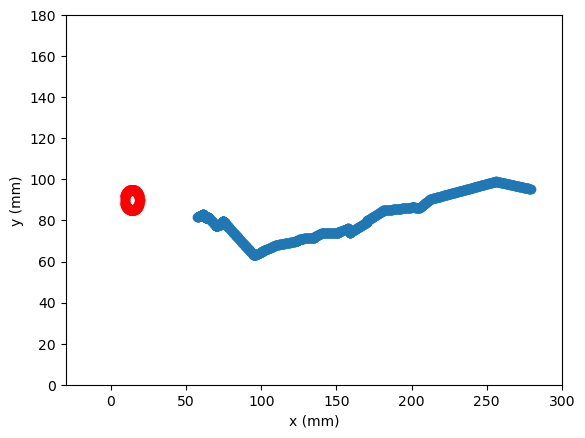

9
0


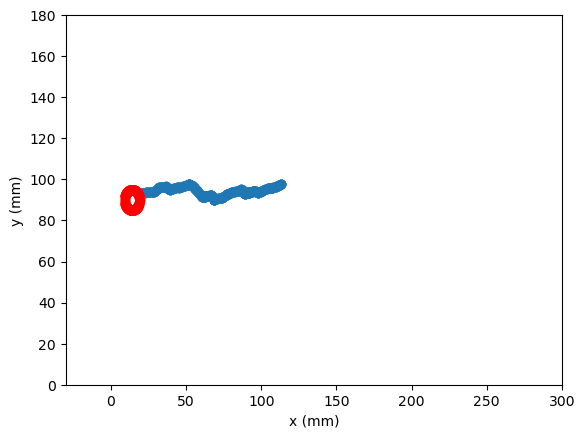

10
0


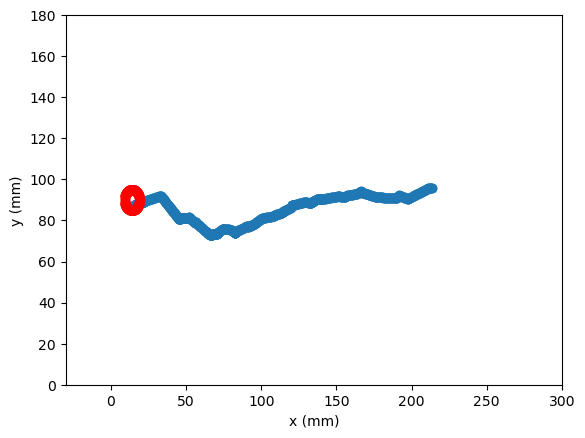

11
0


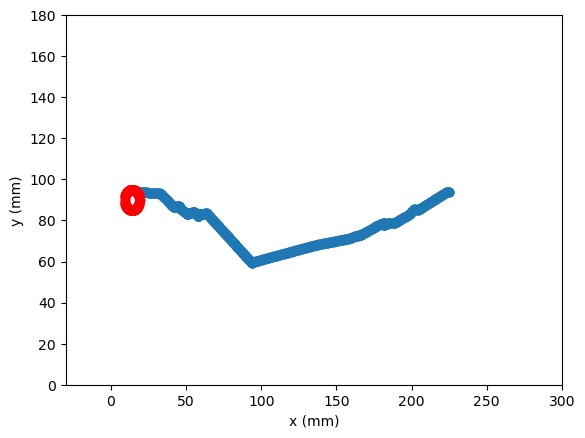

12
0


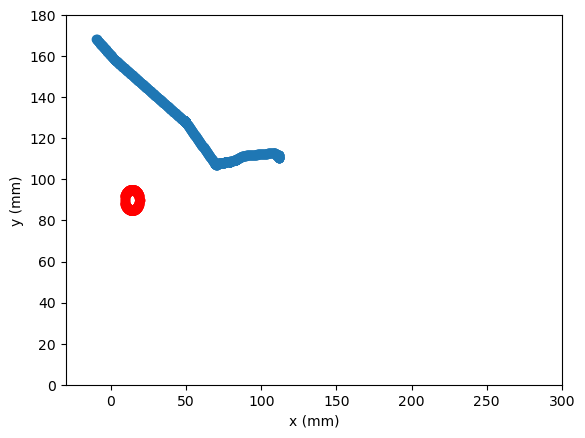

13
0


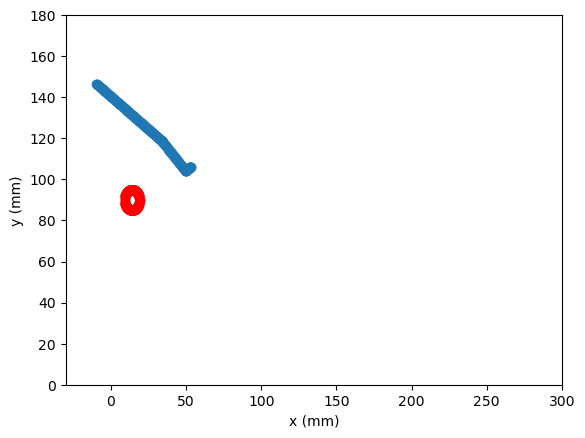

14
0


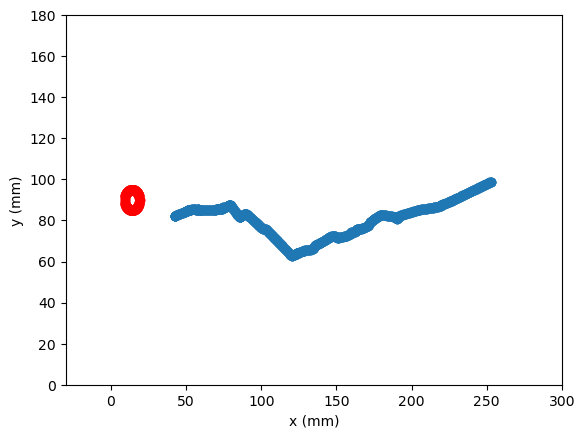

15
0


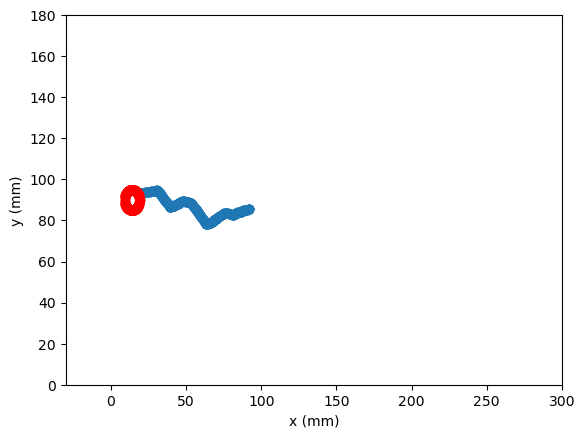

16
0


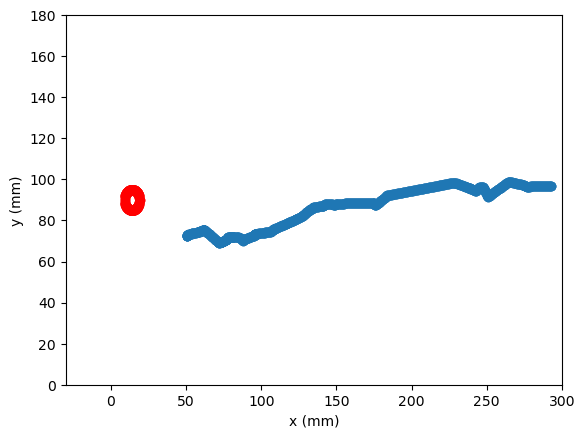

17
0


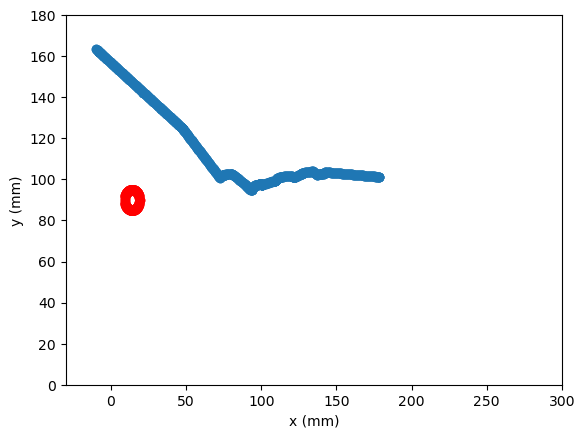

18
0


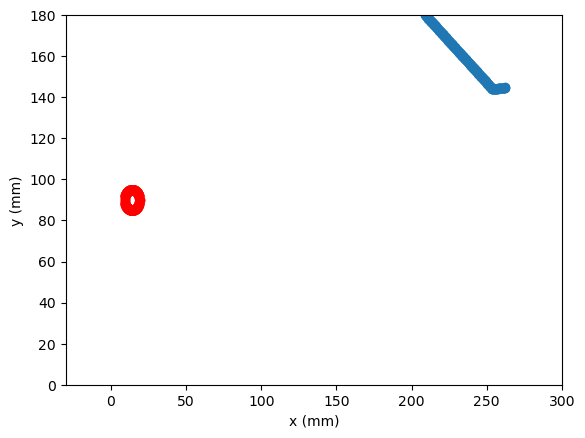

19
0


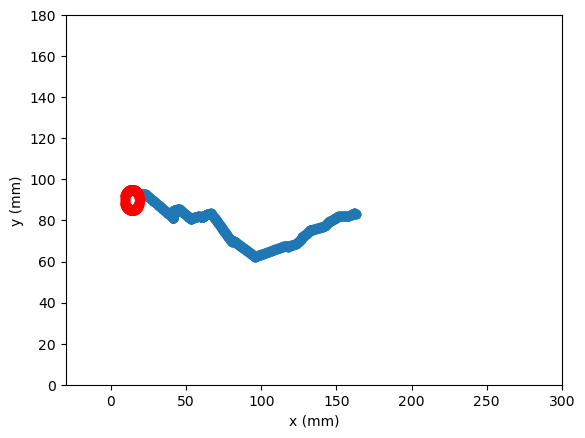

20
0


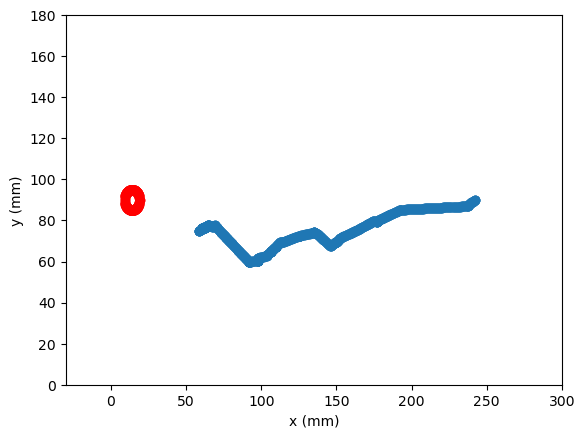

21
0


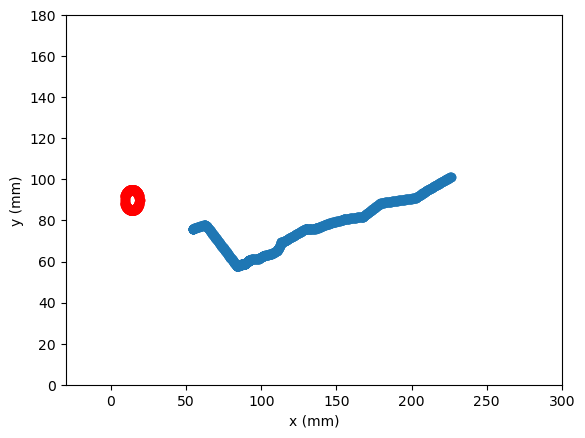

22
0


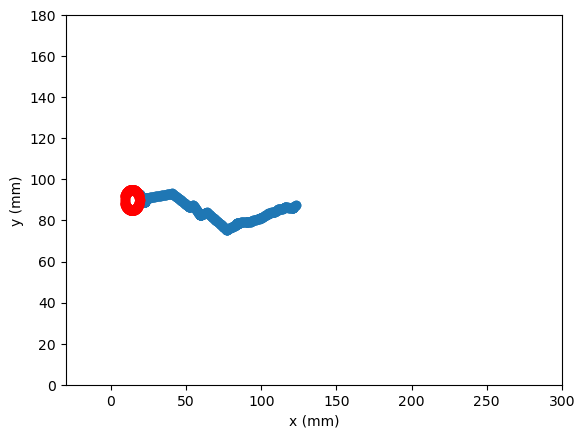

23
0


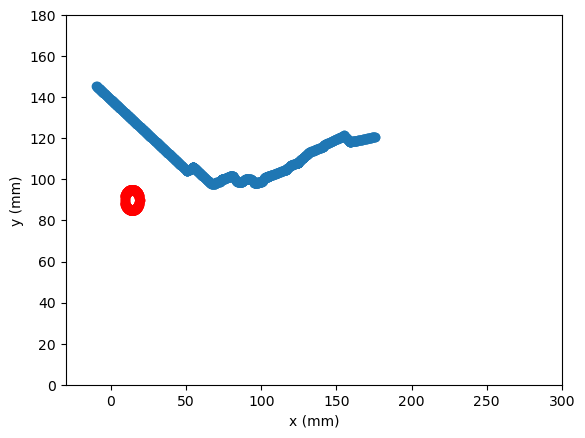

24
0


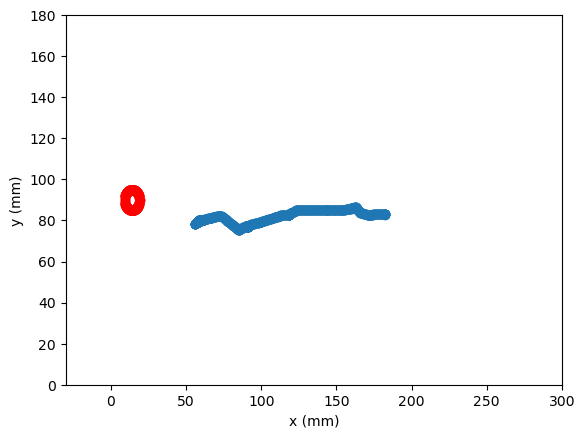

25
0


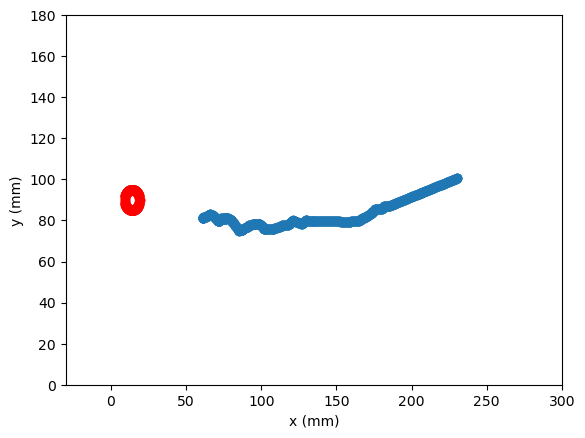

26
0


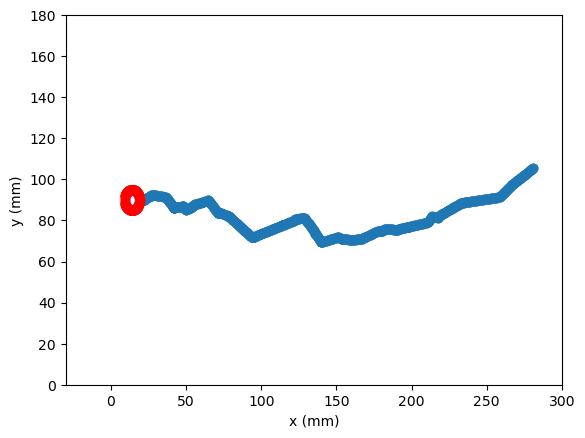

27
0


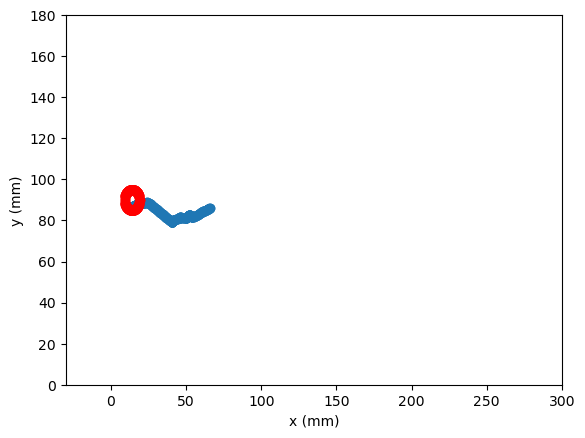

28
0


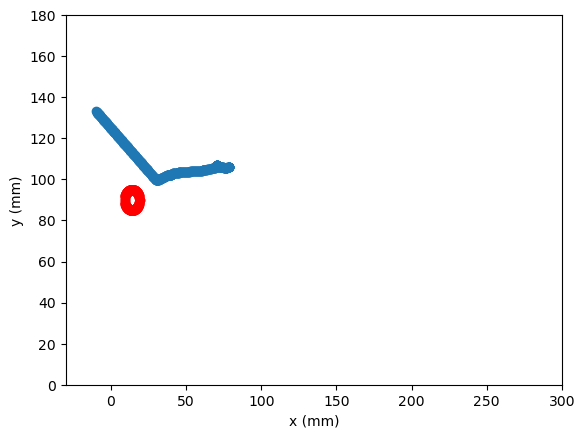

29
0


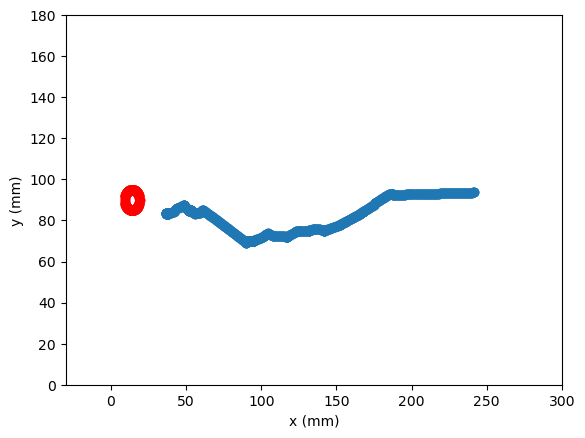

30
0


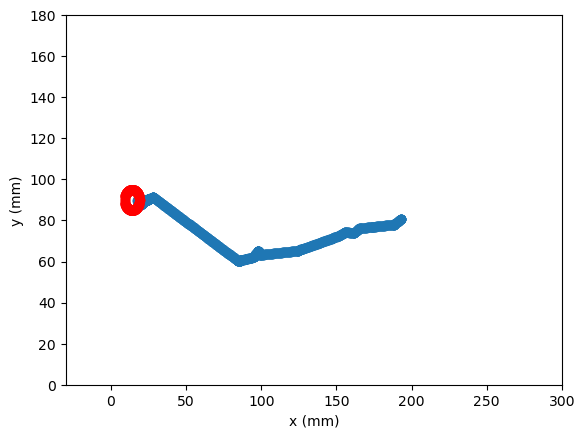

31
0


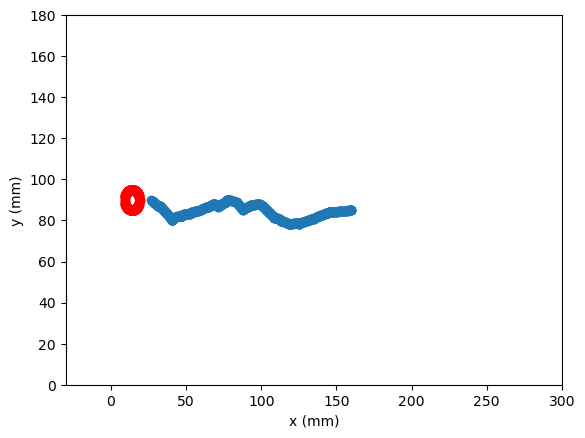

32
0


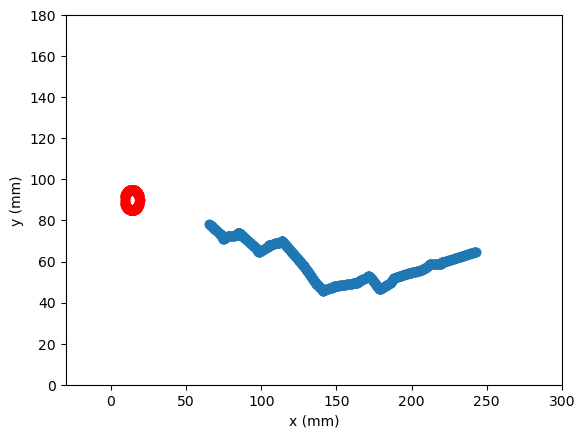

33
0


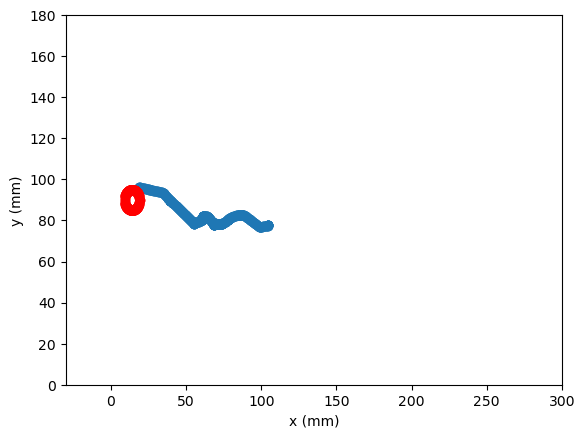

34
0


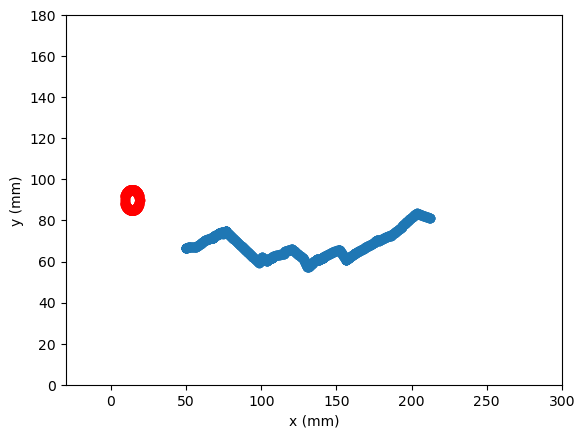

35
0


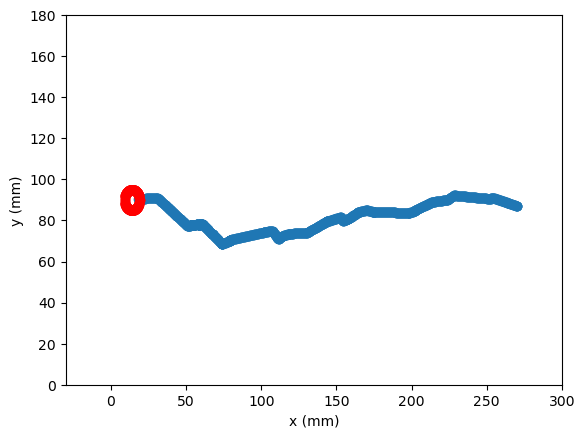

36
0


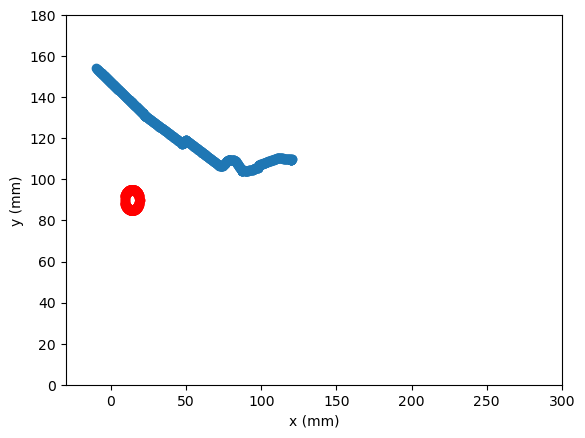

37
0


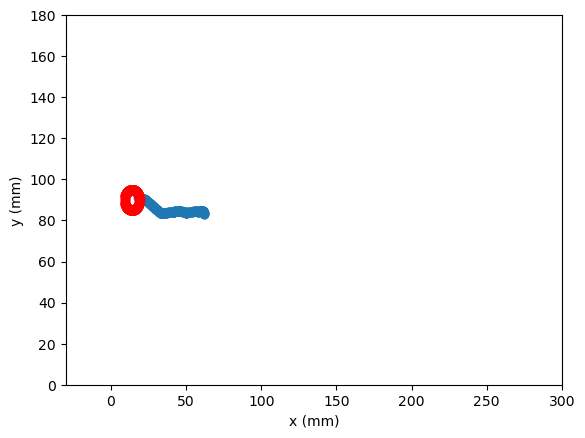

38
0


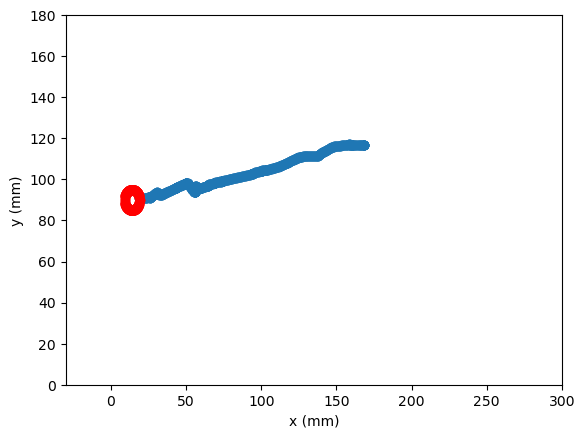

39
0


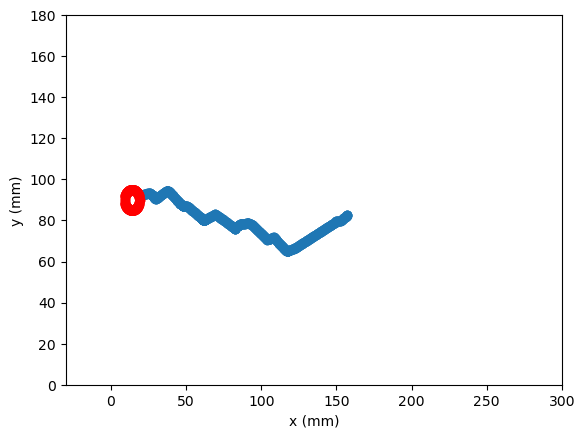

40
0


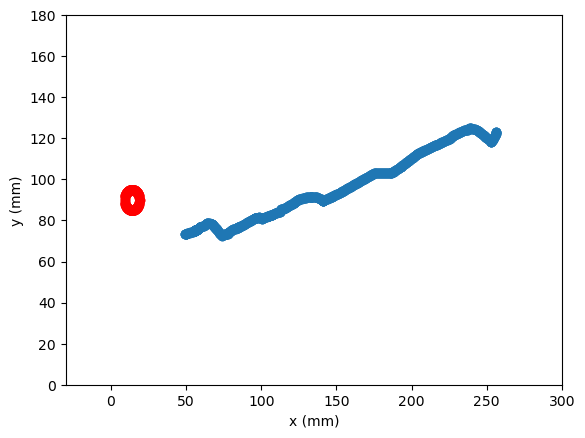

41
0


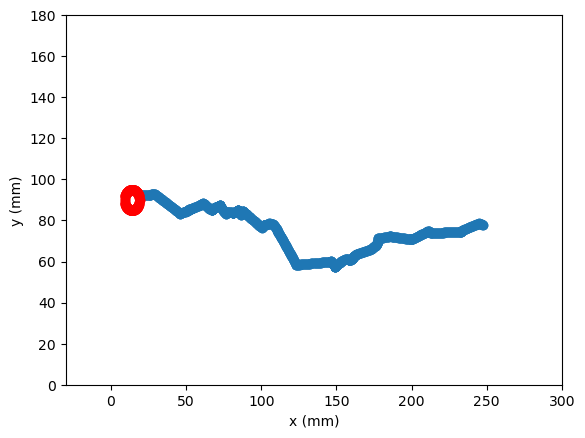

42
0


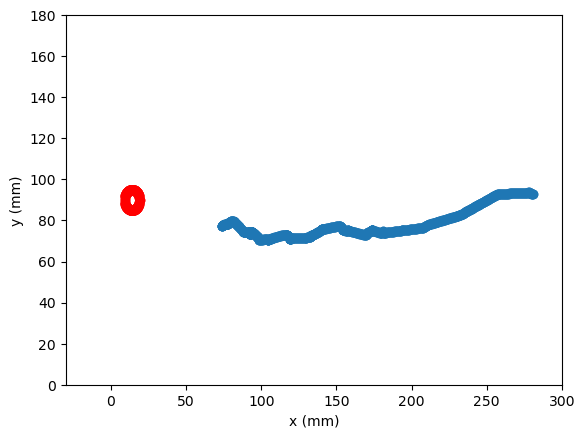

43
0


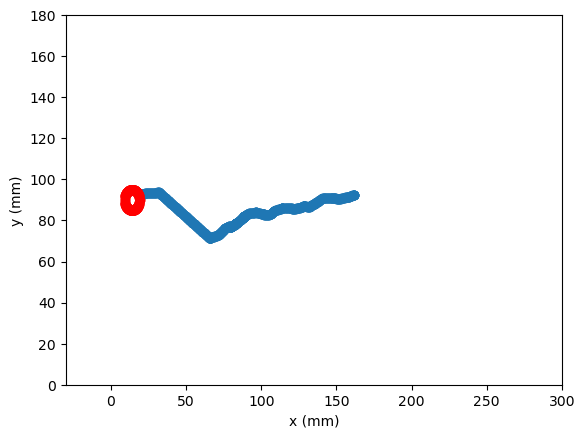

44
0


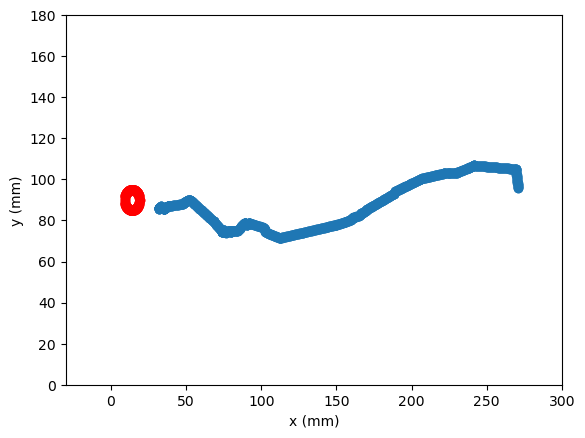

45
0


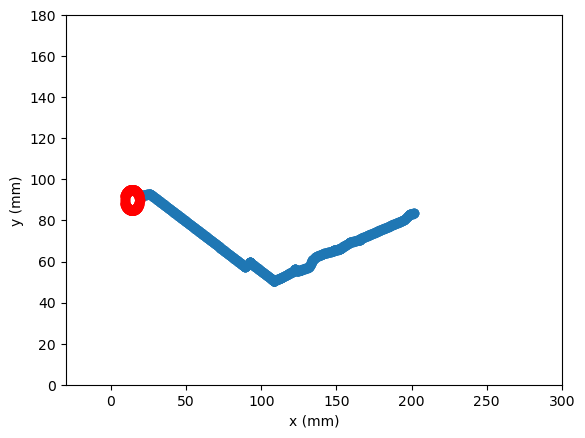

46
0


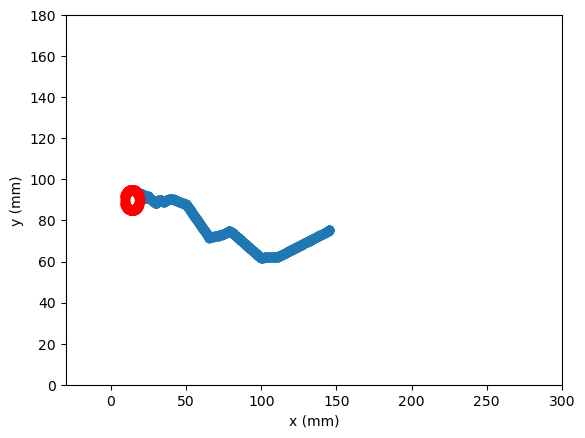

47
0


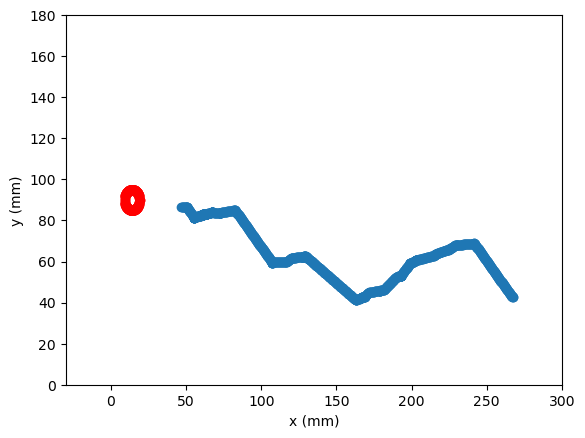

48
0


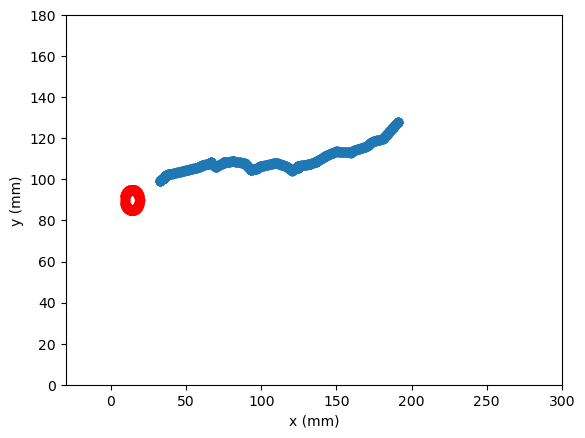

49
0


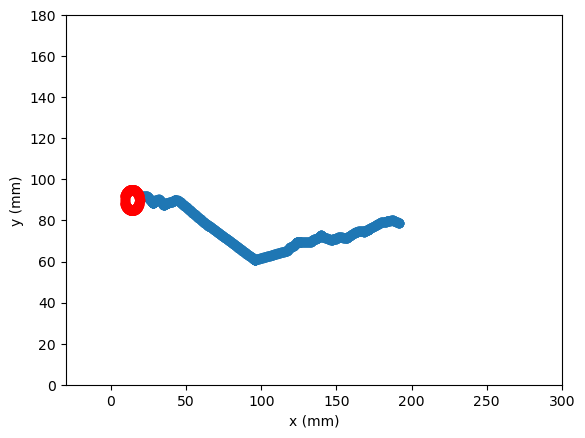

50
0


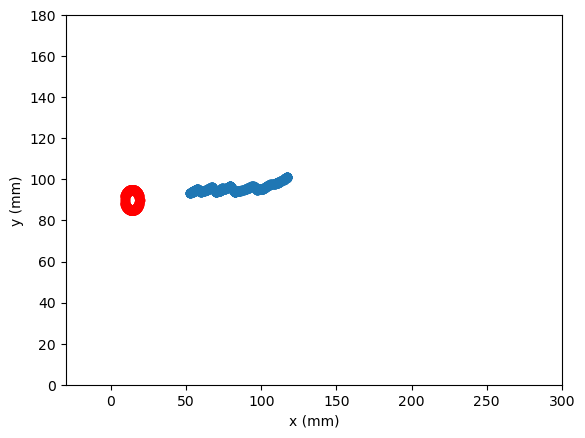

51
0


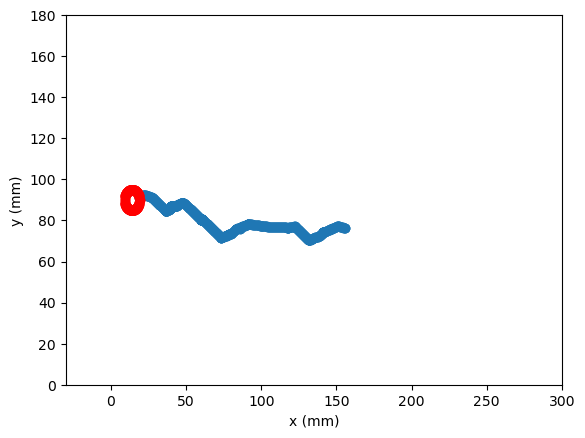

52
0


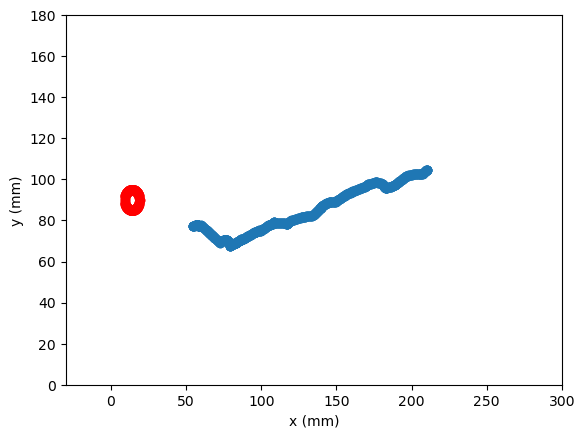

53
0


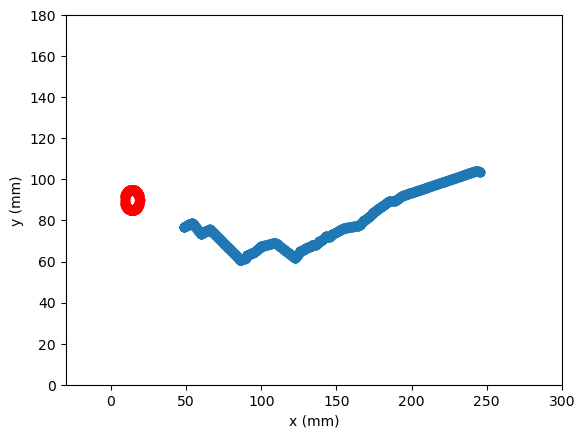

54
0


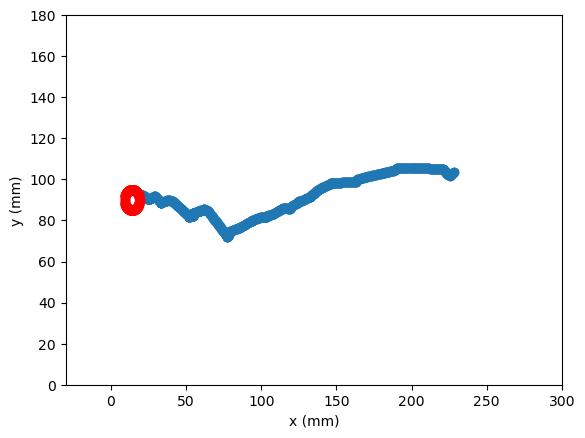

55
0


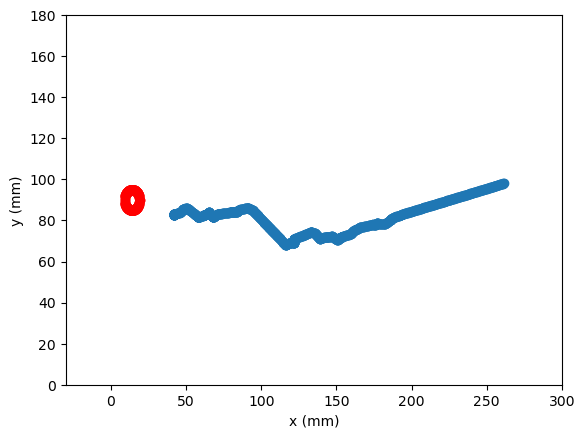

56
0


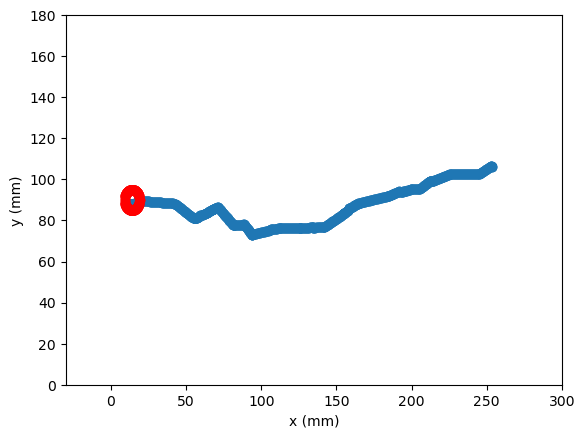

57
0


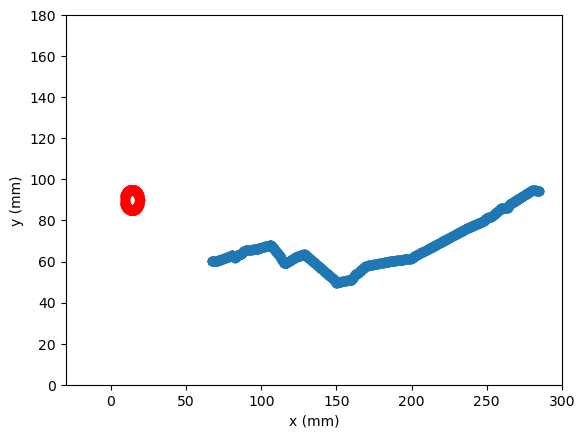

58
0


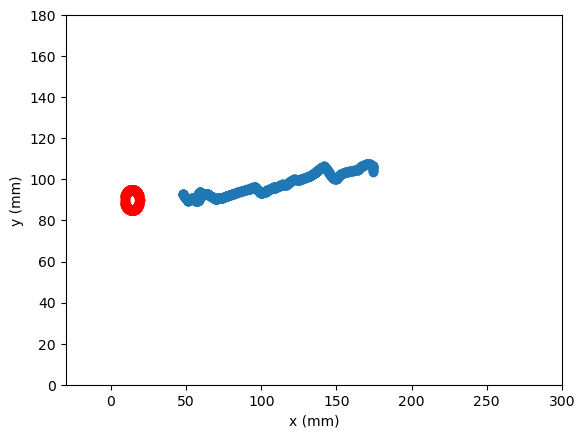

59
0


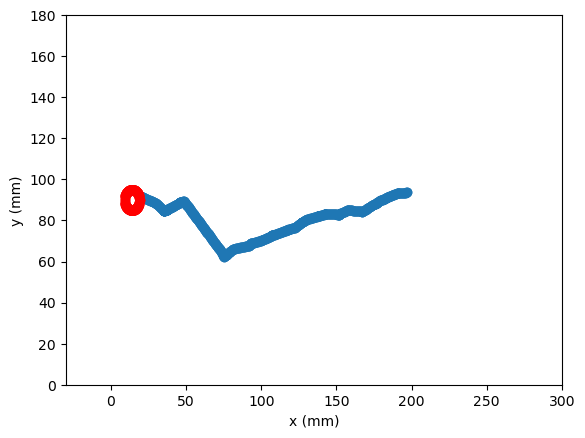

60
0


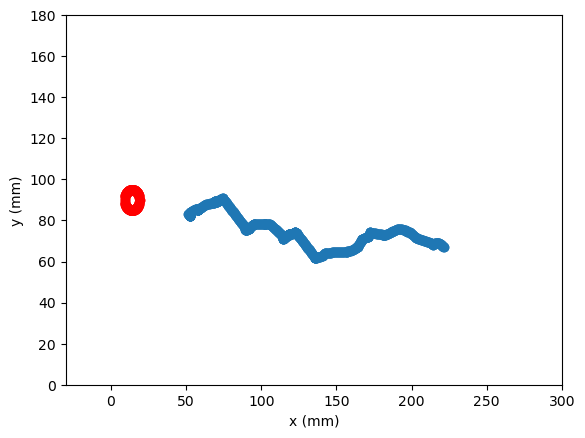

61
0


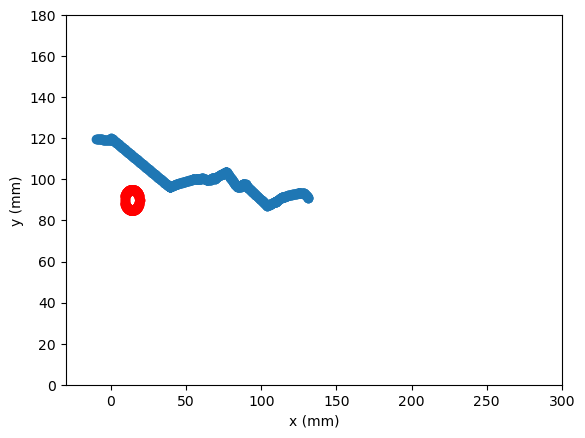

62
0


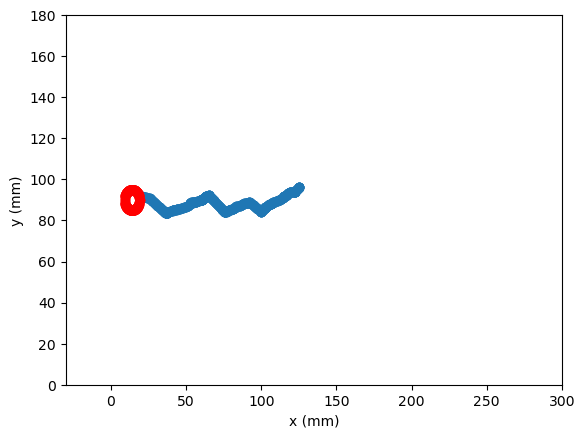

63
0


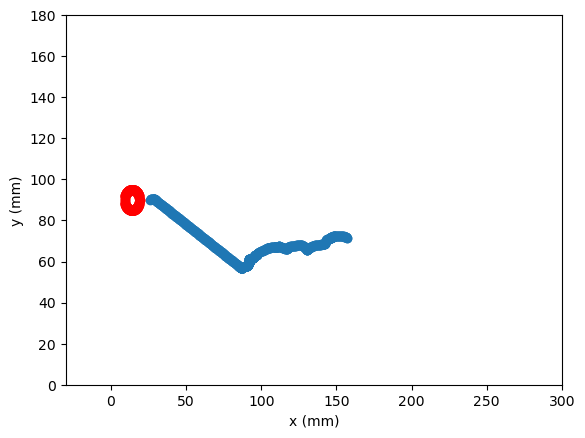

64
0


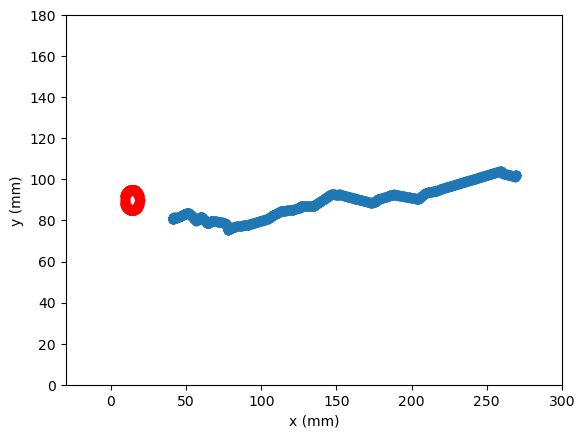

65
0


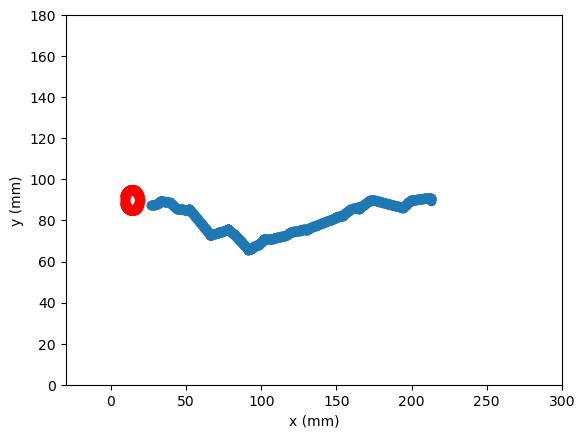

66
0


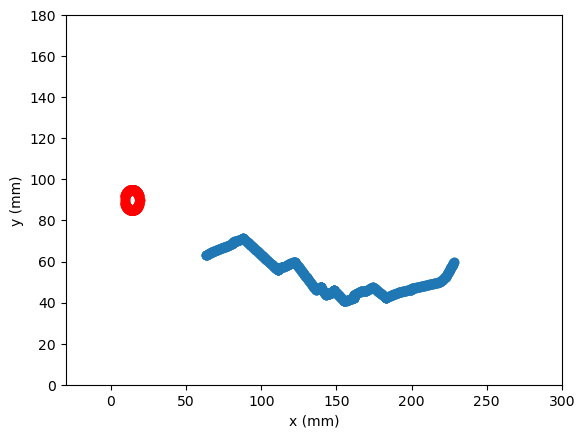

67
0


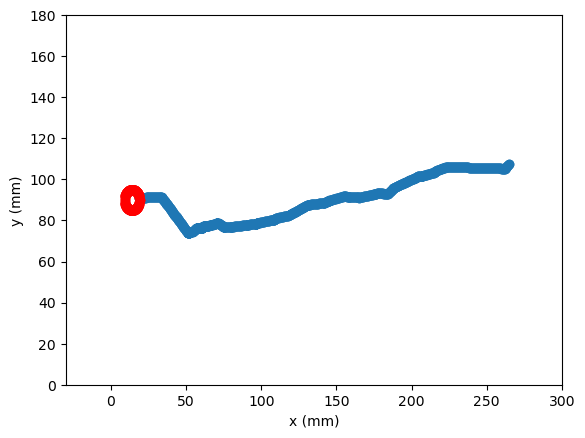

68
0


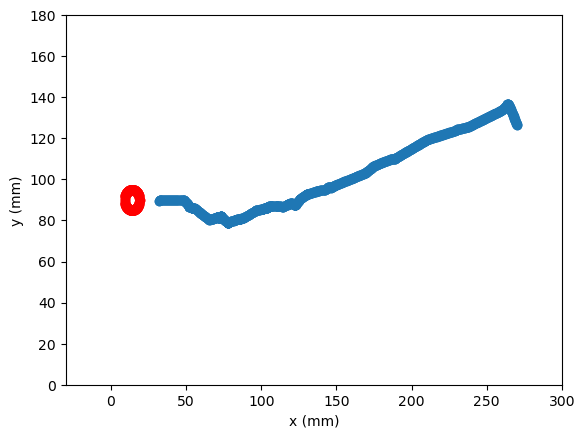

69
0


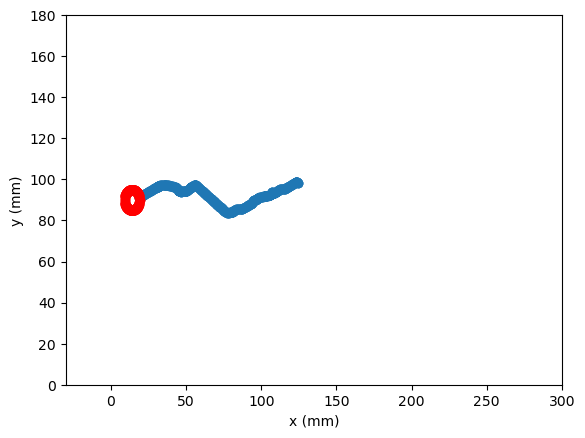

70
0


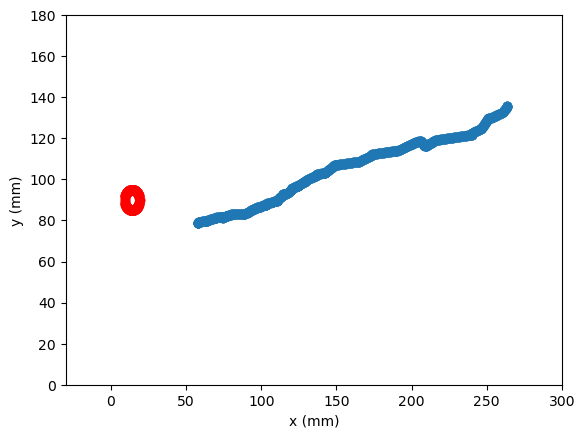

71
0


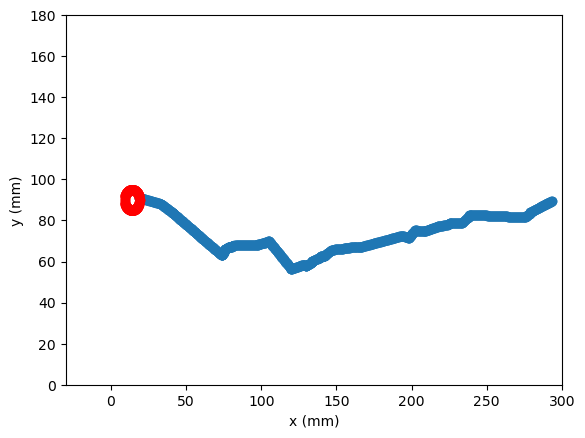

72
0


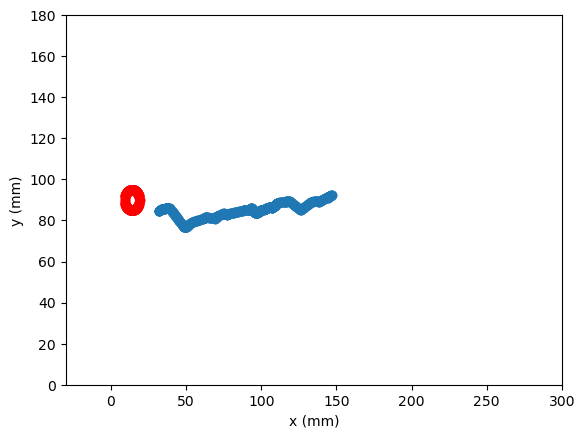

73
0


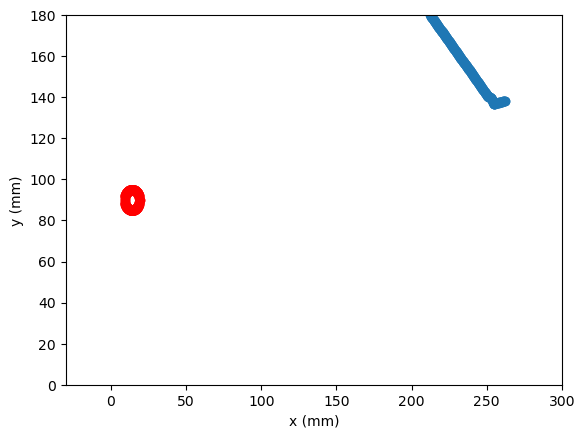

74
0


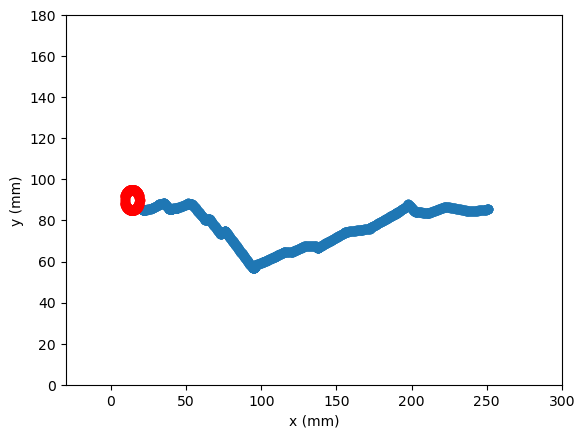

75
0


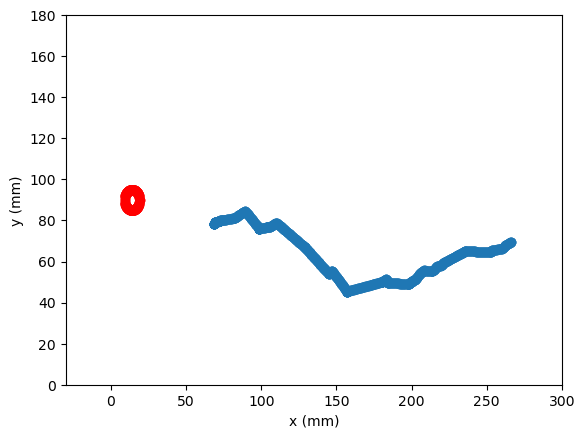

76
0


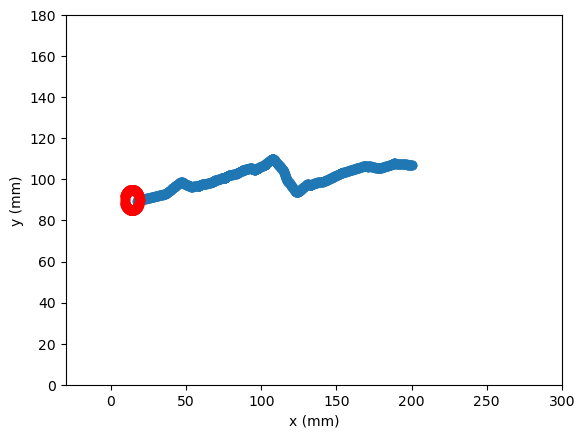

77
0


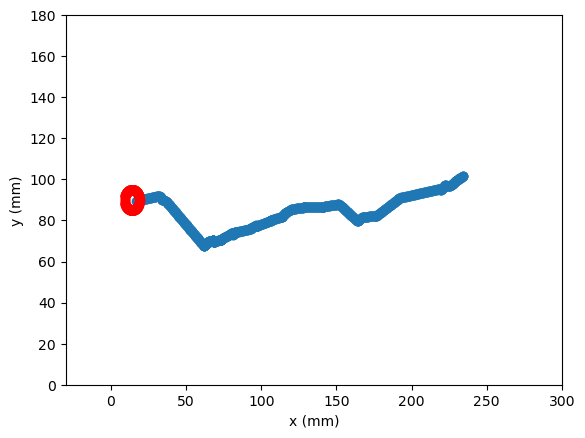

78
0


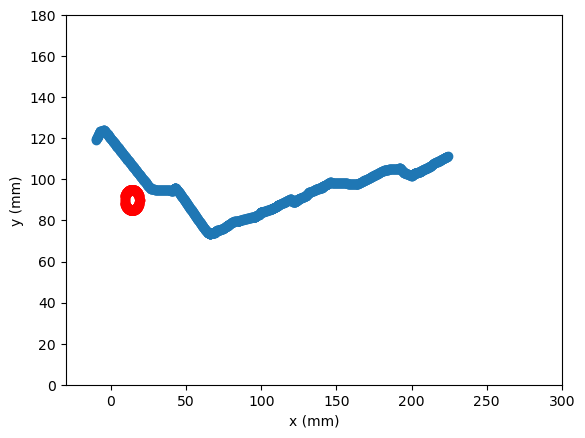

79
0


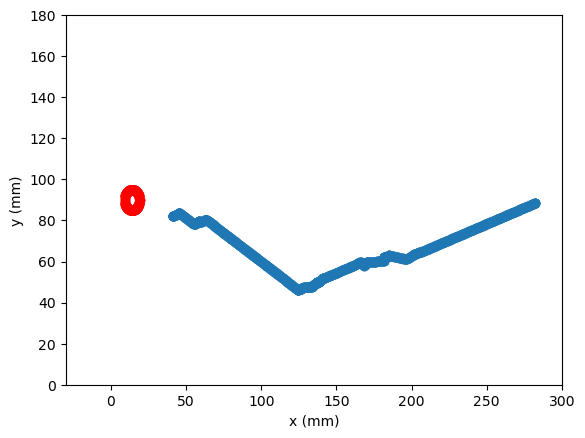

80
0


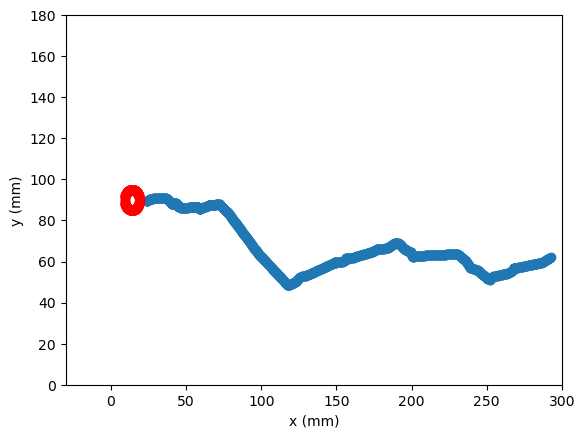

81
0


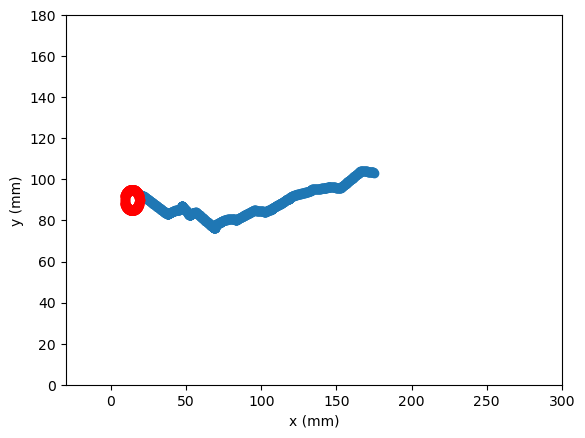

82
0


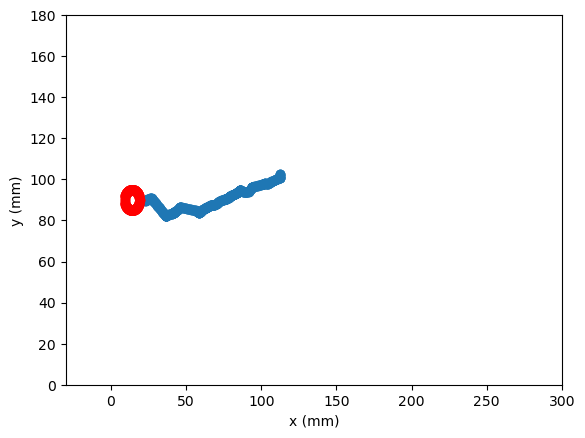

83
0


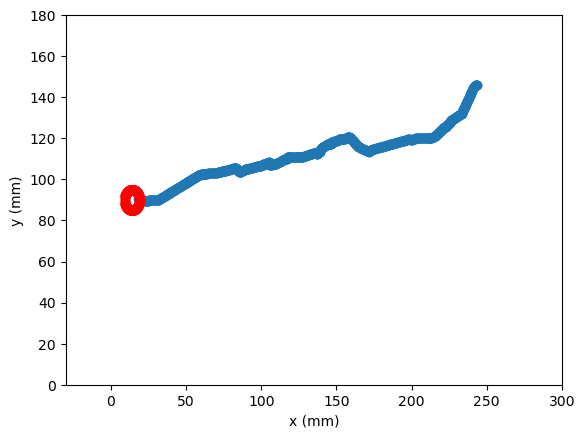

84
0


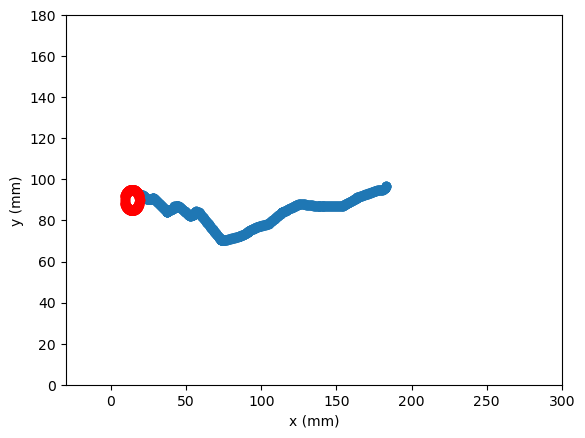

85
0


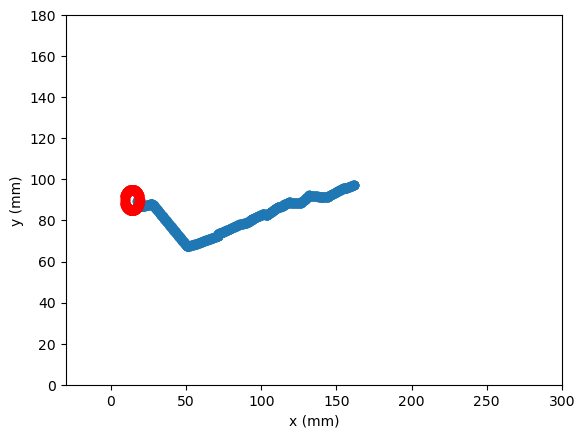

86
0


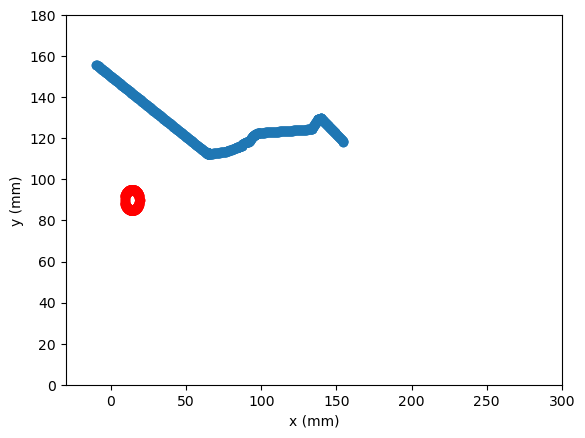

87
0


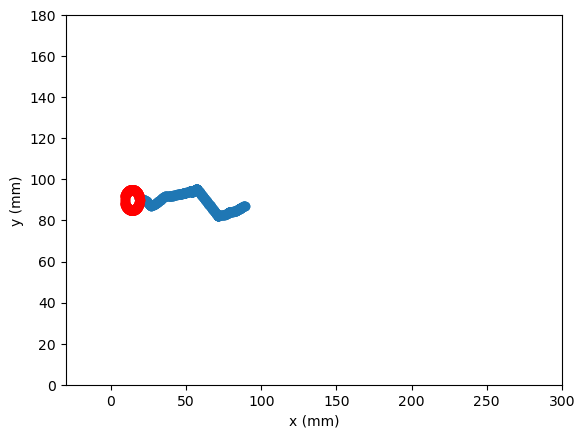

88
0


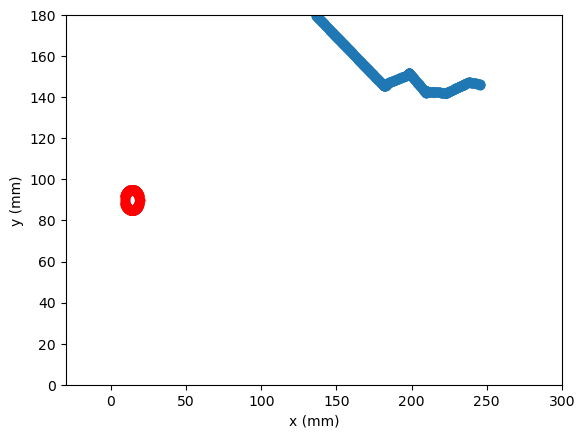

89
0


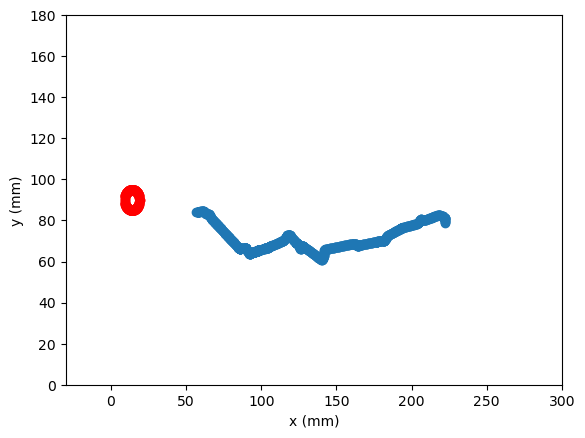

90
0


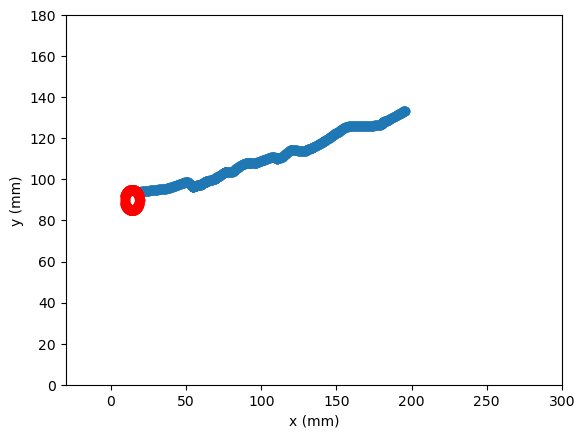

91
0


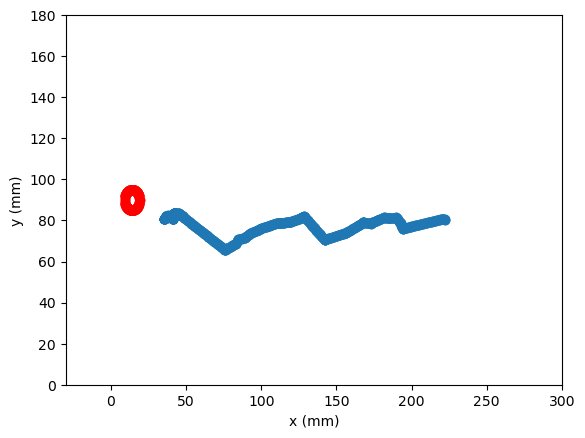

92
0


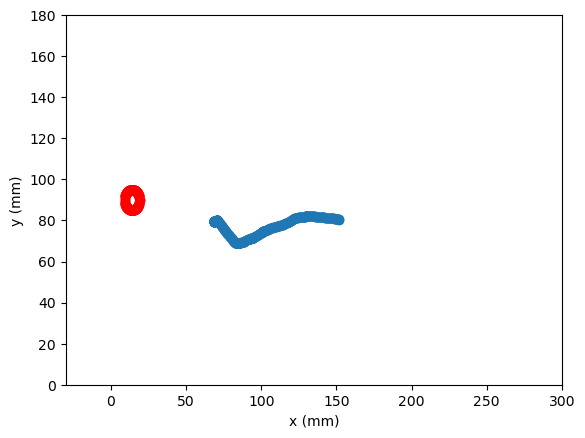

93
0


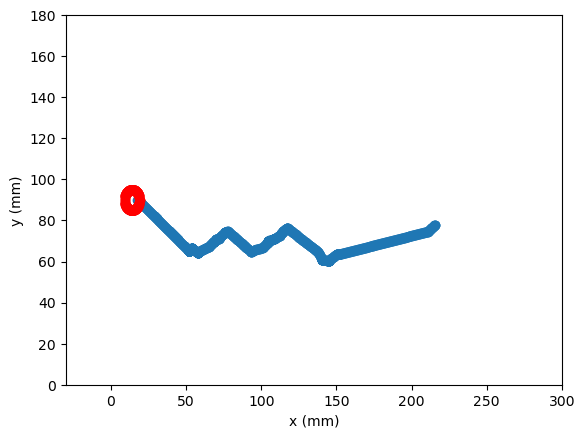

94
0


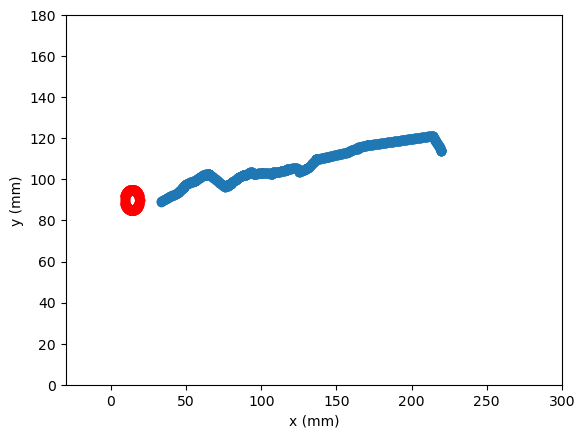

95
0


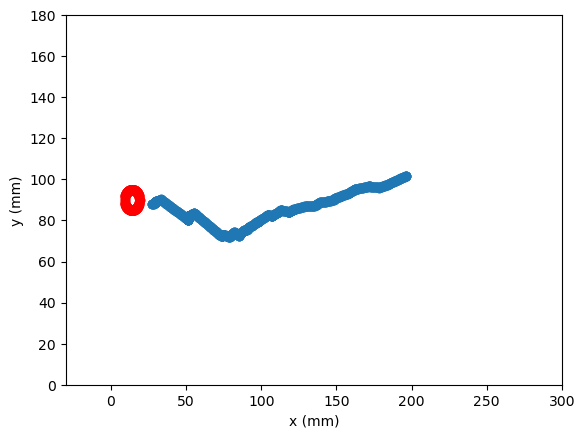

96
0


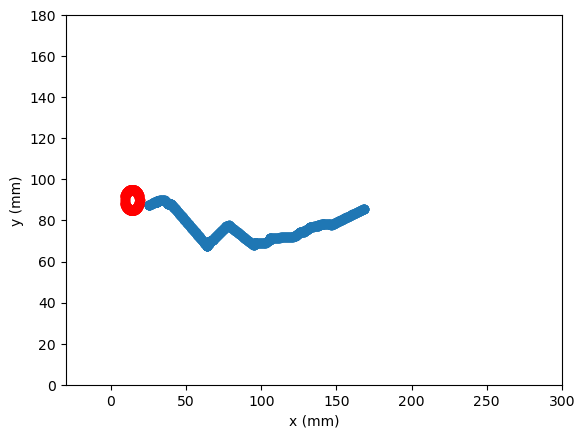

97
0


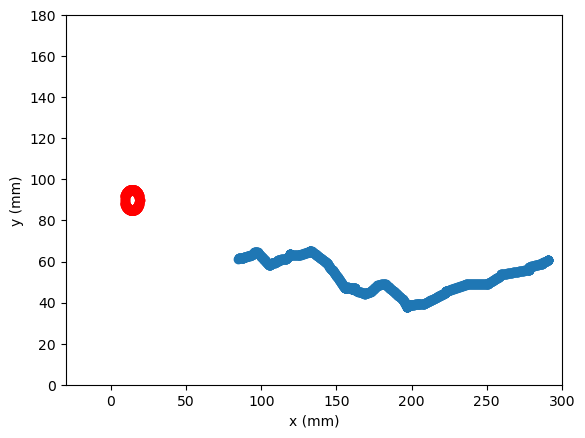

98
0


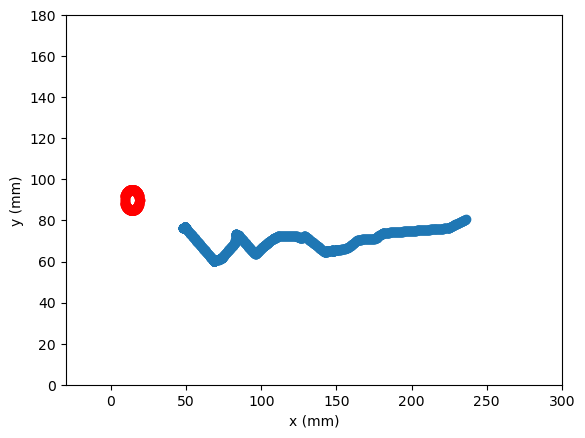

99
0


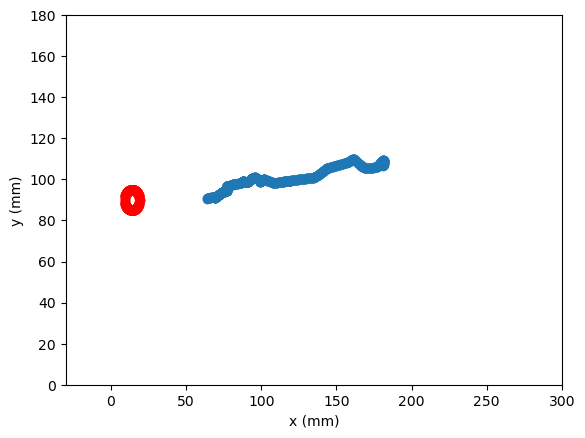

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

path = '../trained_models/new_movie_with_int_061923/normal_reward/'

data = np.load(path+'0_data_arr.npy')
print(np.shape(data))
#print(np.sum(data[:,3]==0))

#first plot trajectories

#conc, grad, mot, theta, x, y, action

src_x = 14
src_y = 90
rad = 5

x_circ = np.linspace(src_x-rad,src_x+rad,100)
y_circ_pos = src_y + np.sqrt(rad**2-(x_circ-src_x)**2)
y_circ_neg = src_y - np.sqrt(rad**2-(x_circ-src_x)**2)


for i in range(0,100):
    
    
    print(i)
    traj_info = data[...,i]
    x = traj_info[:,6]
    y = traj_info[:,7]
    action = traj_info[:,5]
    theta = traj_info[:,4]
    print(np.sum(theta==0))
    first_action_label = action==1
    second_action_label = action==2
    #print(np.sum(action_label))
    
    plt.scatter(x,y)
    #plt.scatter(x[first_action_label],y[first_action_label])
    #plt.scatter(x[second_action_label],y[second_action_label])
    plt.xlim([-30,300])
    plt.ylim([0,180])
    plt.scatter(x_circ, y_circ_pos, c = 'red')
    plt.scatter(x_circ, y_circ_neg, c = 'red')
    
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    
    plt.show()




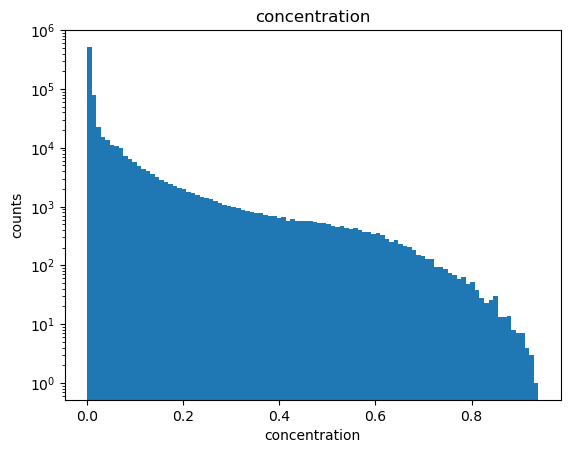

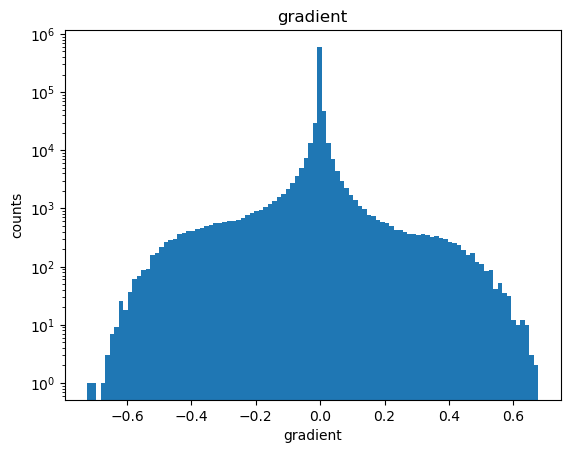

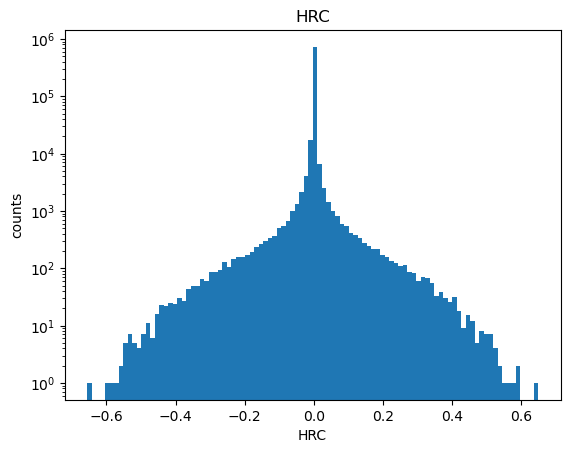

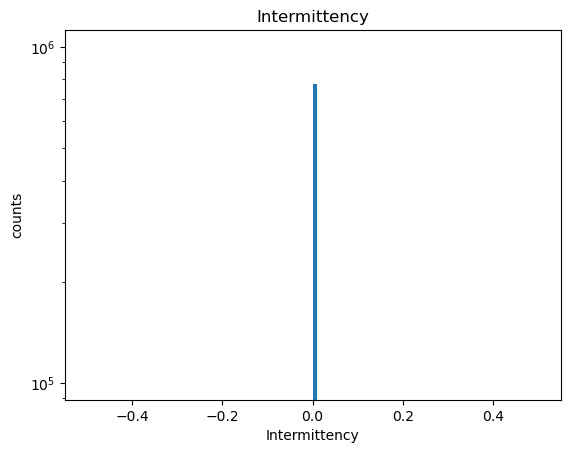

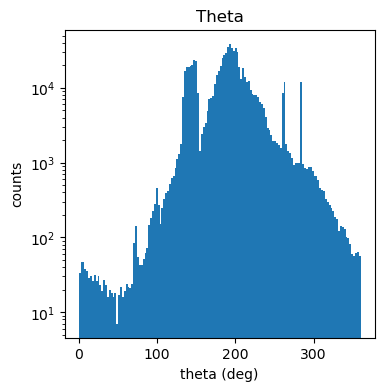

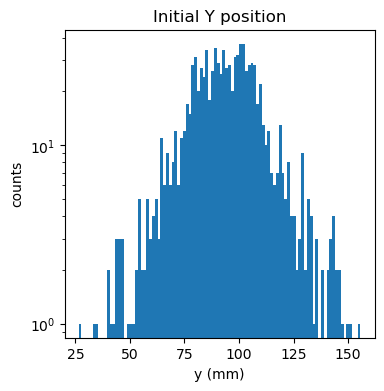

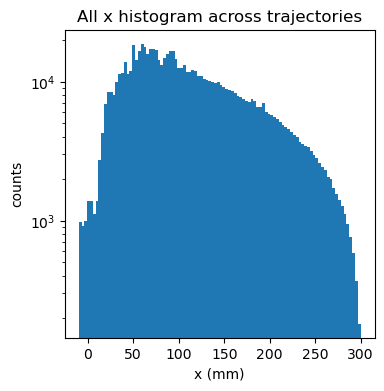

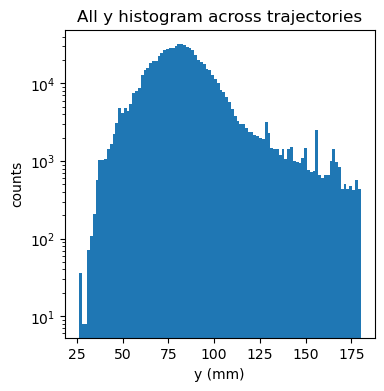

0.218


In [5]:
#flatten array

num_pts = 4500

n = num_pts*1000
sub_n = num_pts*100

all_dat = np.zeros((n,8))

init_ys = np.zeros(1000)

count = 0

for i in range(0,10):
    
    dat = np.load(path+str(i)+"_data_arr.npy")
    #print("0 thetas = ", np.sum(dat[:,3,:]==0))
    sub_dat = np.zeros((sub_n, 8))
    
    for j in range(0,100):
        
        sub_dat[j*num_pts:(j+1)*num_pts] = dat[...,j]
        curr = dat[...,j]
        init_ys[count] = curr[:,7][0]
        count+=1 
        
        
    all_dat[i*sub_n:(i+1)*sub_n] = sub_dat
    
plt.hist(all_dat[:,0], bins = 100)
plt.xlabel('concentration')
plt.yscale('log')
plt.ylabel('counts')
plt.title('concentration')
plt.show()

plt.hist(all_dat[:,1], bins = 100)
plt.xlabel('gradient')
plt.yscale('log')
plt.title('gradient')
plt.ylabel('counts')
plt.show()


plt.hist(all_dat[:,2], bins = 100)
plt.xlabel('HRC')
plt.yscale('log')
plt.ylabel('counts')
plt.title('HRC')
plt.show()


plt.hist(all_dat[:,3], bins = 100)
plt.xlabel('Intermittency')
plt.yscale('log')
plt.ylabel('counts')
plt.title('Intermittency')
plt.show()

plt.figure(figsize=(4,4))
plt.hist(all_dat[:,4]*180/np.pi, bins = 150)
plt.xlabel('theta (deg)')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Theta')
plt.show()

plt.figure(figsize=(4,4))
plt.hist(init_ys, bins = 100)
plt.xlabel('y (mm)')
plt.ylabel('counts')
plt.yscale('log')
plt.title('Initial Y position')
plt.show()


plt.figure(figsize=(4,4))
plt.hist(all_dat[:,6], bins = 100)
plt.xlabel('x (mm)')
plt.ylabel('counts')
plt.yscale('log')
plt.title('All x histogram across trajectories')
plt.show()


plt.figure(figsize=(4,4))
plt.hist(all_dat[:,7], bins = 100)
plt.xlabel('y (mm)')
plt.ylabel('counts')
plt.yscale('log')
plt.title('All y histogram across trajectories')
plt.show()

y_bool = (init_ys > 85)*(init_ys < 95)
print(np.mean(y_bool))

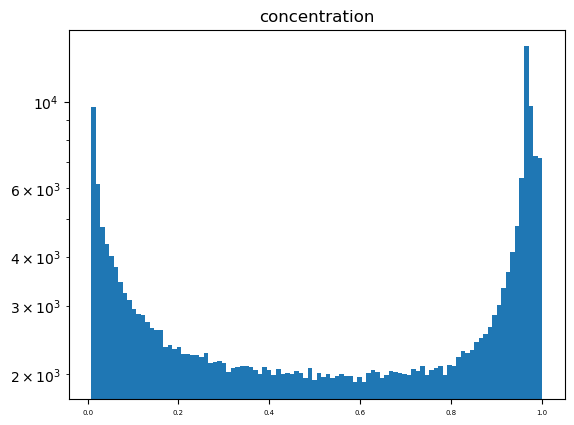

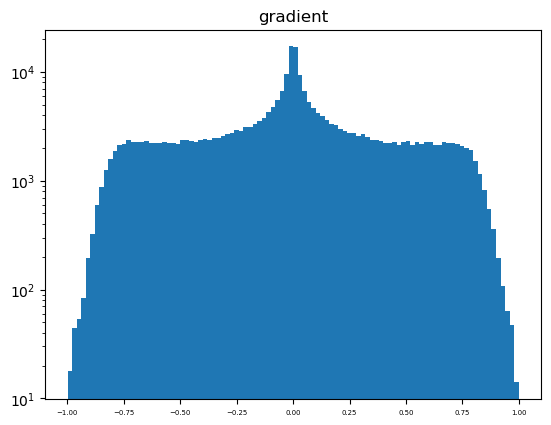

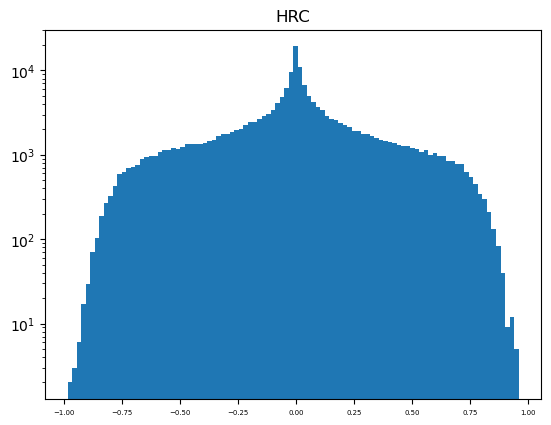

In [114]:

col = all_dat[:,0]
plt.hist(col[col!=0], bins = 100)
plt.yscale('log')
plt.title('concentration')
plt.show()

col = all_dat[:,1]
plt.hist(col[col!=0], bins = 100)
plt.yscale('log')
plt.title('gradient')
plt.show()
        
col = all_dat[:,2]
plt.hist(col[col!=0], bins = 100)
plt.yscale('log')
plt.title('HRC')
plt.show()


In [6]:
#let's first remove nans

nan_inds = np.isnan(np.sum(all_dat, axis =1))
not_nan_inds = np.logical_not(nan_inds)

all_dat = all_dat[not_nan_inds, :]

print(np.shape(all_dat))

(773359, 8)


In [25]:
#bins are closed on the left and open on the right. What bin edges do we want?
"""
all_non_zero_conc = all_dat[:,0][all_dat[:,0]!=0]
all_non_zero_grad = all_dat[:,1][all_dat[:,1]!=0]
all_non_zero_hrc = all_dat[:,2][all_dat[:,2]!=0]

print(np.min(np.abs(all_non_zero_conc)))
print(np.min(np.abs(all_non_zero_grad)))
print(np.min(np.abs(all_non_zero_hrc)))

#4x5x5x8 bins in total

bins_conc = np.array([0,0.002,0.2,0.8,1])
bins_grad = np.array([-1,-0.5,-0.002,0.002,0.5,1])
bins_hrc = np.array([-1,-0.5,-1e-6,1e-6,0.5,1])
bins_theta = np.linspace(0,2*np.pi,9)

dig_conc = np.digitize(all_dat[:,0], bins = bins_conc)-1
dig_grad = np.digitize(all_dat[:,1], bins = bins_grad)-1
dig_hrc = np.digitize(all_dat[:,2], bins = bins_hrc) -1
dig_theta = np.digitize(all_dat[:,3], bins = bins_theta) -1
"""

3.9455940328253696e-18
3.7122866854088243e-32
2.3317298160702805e-39


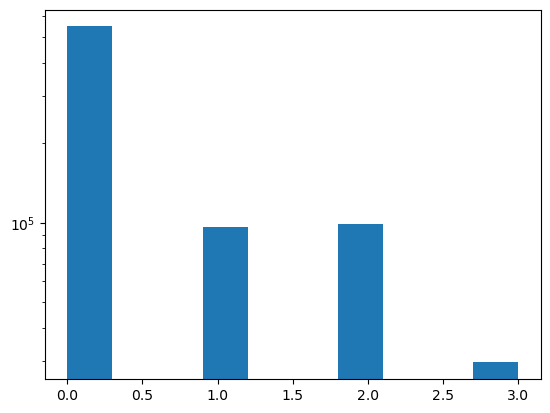

95912
98500
z =  -5.869522043154885


'\nchoice_table = np.zeros((num_states,4))\n\nfor i in range(0,len(bins_conc)-1):  \n    \n    for j in range(0,len(bins_grad)-1):\n        \n        for k in range(0,len(bins_hrc)-1):\n            \n            for l in range(0,len(bins_theta)-1):\n                               \n                label = str(i)+str(j-2)+str(k-2)+str(l)\n                label_list.append(label)\n                rel_bool = (dig_conc==i)*(dig_grad==j)*(dig_hrc==k)*(dig_theta==l)\n                rel_actions = actions[rel_bool]\n                choice_table[count,0] = np.sum(rel_actions==0)\n                choice_table[count,1] = np.sum(rel_actions==1)\n                choice_table[count,2] = np.sum(rel_actions==2)\n                choice_table[count,3] = np.sum(rel_actions==3)\n                \n                count+=1\n'

In [7]:
"""
label_list = []
num_states = (len(bins_conc)-1)*(len(bins_grad)-1)*(len(bins_hrc)-1)*(len(bins_theta)-1)
"""
count = 0

actions = all_dat[:,5]

plt.hist(actions)
plt.yscale('log')
plt.show()

print(np.sum(actions==1))
print(np.sum(actions==2))

num_L = np.sum(actions==1)
num_R = np.sum(actions==2)

n = num_L + num_R
p0 = 0.5
p = num_L/n

denom = np.sqrt(p0*(1-p0)/n)
num = p-p0
print('z = ', num/denom)


"""
choice_table = np.zeros((num_states,4))

for i in range(0,len(bins_conc)-1):  
    
    for j in range(0,len(bins_grad)-1):
        
        for k in range(0,len(bins_hrc)-1):
            
            for l in range(0,len(bins_theta)-1):
                               
                label = str(i)+str(j-2)+str(k-2)+str(l)
                label_list.append(label)
                rel_bool = (dig_conc==i)*(dig_grad==j)*(dig_hrc==k)*(dig_theta==l)
                rel_actions = actions[rel_bool]
                choice_table[count,0] = np.sum(rel_actions==0)
                choice_table[count,1] = np.sum(rel_actions==1)
                choice_table[count,2] = np.sum(rel_actions==2)
                choice_table[count,3] = np.sum(rel_actions==3)
                
                count+=1
"""

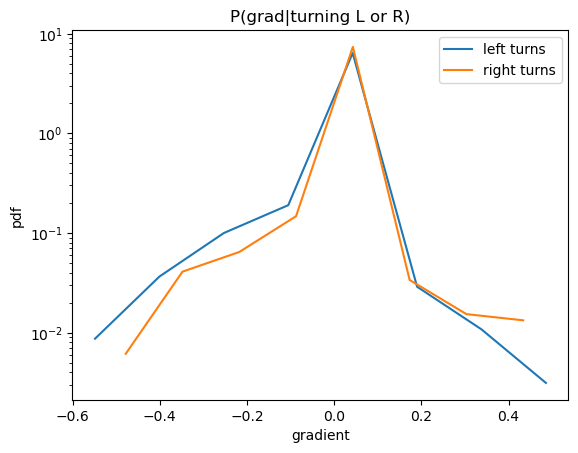

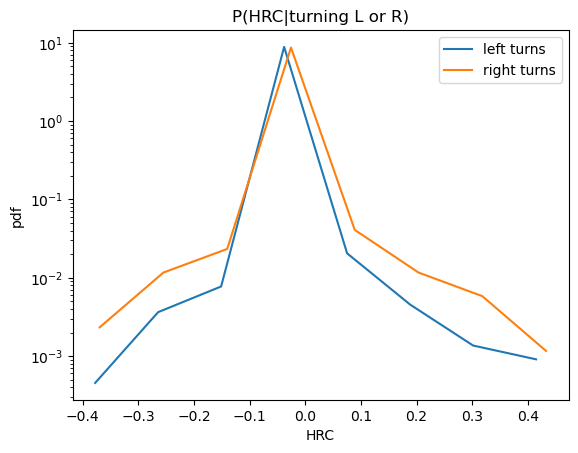

-4.281546658872533e-05
-6.000859807783906e-05
-0.007401105355531153
-0.0031570122304091152


In [12]:
theta_deg = all_dat[:,4]*180/np.pi
x = all_dat[:,6]
y = all_dat[:,7]
conc = all_dat[:,0]
grad = all_dat[:,1]
hrc = all_dat[:,2]

non_zero_grad = grad != 0
non_zero_mot = hrc != 0

theta_bin = (theta_deg>135)*(theta_deg<225)
#y_bin = ((y>100)*(y<110))+((y<80)*(y>70))

near_bin = (x>30)*(x<75)*(y>80)*(y<100)
wing_bin = ((y>100)*(y<120)+(y<80)*(y>60))*(x>100)

grad_for_turn_L = all_dat[:,1][(actions==1)*(theta_bin)*near_bin]
grad_for_turn_R = all_dat[:,1][(actions==2)*(theta_bin)*near_bin]

mot_for_turn_L = all_dat[:,2][(actions==1)*(theta_bin)*near_bin]
mot_for_turn_R = all_dat[:,2][(actions==2)*(theta_bin)*near_bin]

def get_pdf(dat, bin_num):
    
    counts, bins = np.histogram(dat, bins=bin_num)
    probs = counts/np.sum(counts)
    bw = bins[1]-bins[0]
    pdf = probs/bw
    plot_bins = (bins[0:-1]+bins[1:])/2
    
    return pdf, plot_bins

bin_num = 8

grad_L_pdf, grad_L_bins = get_pdf(grad_for_turn_L, bin_num=bin_num)
grad_R_pdf, grad_R_bins = get_pdf(grad_for_turn_R, bin_num=bin_num)

mot_L_pdf, mot_L_bins = get_pdf(mot_for_turn_L, bin_num=bin_num)
mot_R_pdf, mot_R_bins = get_pdf(mot_for_turn_R, bin_num=bin_num)

plt.plot(grad_L_bins, grad_L_pdf, label ='left turns')
plt.plot(grad_R_bins, grad_R_pdf, label = 'right turns')
plt.legend()
plt.xlabel('gradient')
plt.ylabel('pdf')
plt.title("P(grad|turning L or R)")
plt.yscale('log')
plt.show()


plt.plot(mot_L_bins, mot_L_pdf, label ='left turns')
plt.plot(mot_R_bins, mot_R_pdf, label = 'right turns')
plt.legend()
plt.xlabel('HRC')
plt.ylabel('pdf')
plt.title("P(HRC|turning L or R)")
plt.yscale('log')
plt.show()

print(np.mean(mot_for_turn_L))
print(np.mean(mot_for_turn_R))

print(np.mean(grad_for_turn_L))
print(np.mean(grad_for_turn_R))


In [139]:
#get opposite conditionals: probability turn left given gradient above or below zero divided by
#probability of turn given gradient above or below zero

turn_bool=(actions == 1) + (actions == 2)

grad_plus = (grad > 0)[turn_bool]
grad_minus = (grad < 0)[turn_bool]
mot_plus = (hrc > 0)[turn_bool]
mot_minus = (hrc < 0)[turn_bool]

grad_big_plus = (grad > 0.5)[turn_bool]
grad_big_minus = (grad < -0.5)[turn_bool]

mot_big_plus = (hrc > 0.5)[turn_bool]
mot_big_minus = (hrc < -0.5)[turn_bool]


turns = actions[turn_bool]



def get_L_R_probs(turn_data, condition, test_condition):
    
    relevant_dat = turn_data[condition]
    n = len(relevant_dat)
    L_prob = np.sum(relevant_dat==1)/(n)
    
    R_prob = 1-L_prob
    
    test_dat = turn_data[test_condition]
    p0 = np.sum(test_dat==1)/len(test_dat) 
    
    z = (L_prob-p0)/np.sqrt(p0*(1-p0)/n)
    
    thing = (L_prob, R_prob, z)  
    print(thing)
    
    return

grad_test_cond = (grad==0)[turn_bool]
mot_test_cond = (hrc==0)[turn_bool]


get_L_R_probs(turns, grad_plus, grad_test_cond)
get_L_R_probs(turns, grad_minus, grad_test_cond)
get_L_R_probs(turns, grad_big_plus, grad_test_cond)
get_L_R_probs(turns, grad_big_minus, grad_test_cond)

print("")

get_L_R_probs(turns, mot_plus, mot_test_cond)
get_L_R_probs(turns, mot_minus, mot_test_cond)
get_L_R_probs(turns, mot_big_plus, mot_test_cond)
get_L_R_probs(turns, mot_big_minus, mot_test_cond)

(0.7404214559386973, 0.25957854406130265, 28.203526171531017)
(0.6683760683760683, 0.33162393162393167, 23.026120728942725)
(0.7018970189701897, 0.29810298102981025, 8.200225209247229)
(0.5205992509363296, 0.47940074906367036, 1.4834546275353984)

(0.6900425015179114, 0.30995749848208864, 21.28088588254703)
(0.7373358348968105, 0.26266416510318946, 21.48829441875088)
(0.4393530997304582, 0.5606469002695418, -2.5157384210332263)
(0.6111111111111112, 0.38888888888888884, 2.710032776997483)


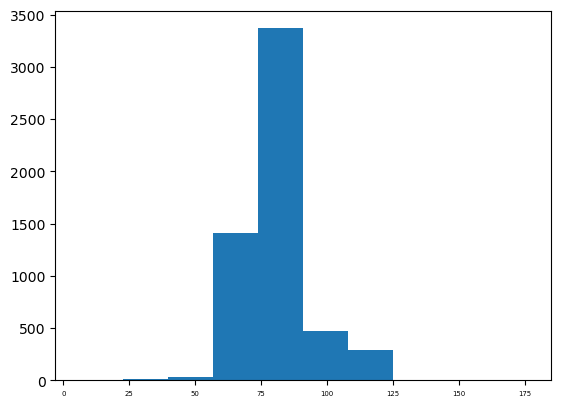

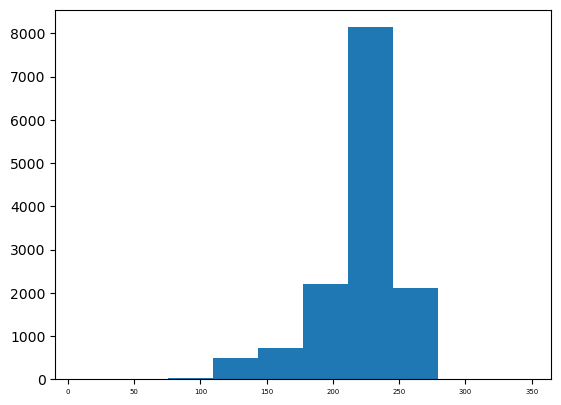

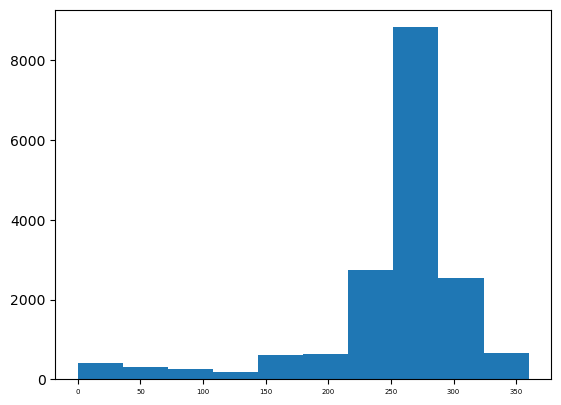

In [61]:
#sanity checks

theta_bin = (theta_deg > 135) * (theta_deg<225)

y = all_dat[:,6]
x = all_dat[:,5]
grad = all_dat[:,1]
plt.hist(y[(actions==1)*(theta_bin)])
plt.show()

plt.hist(theta_deg[actions==1])
plt.show()

plt.hist(theta_deg[actions==2])
plt.show()


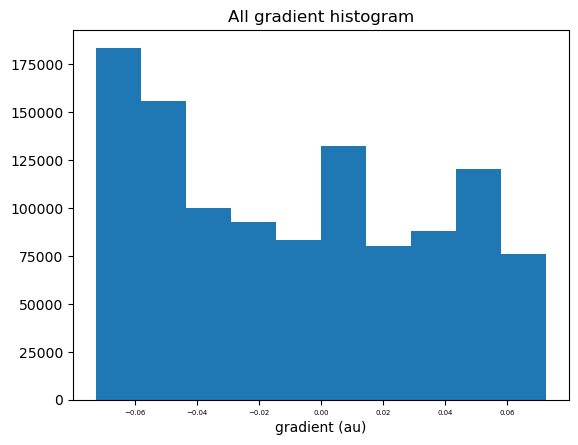

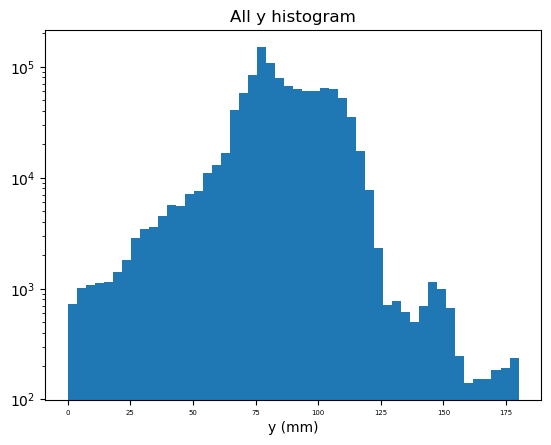

85.66620426427718
18.50911635474141


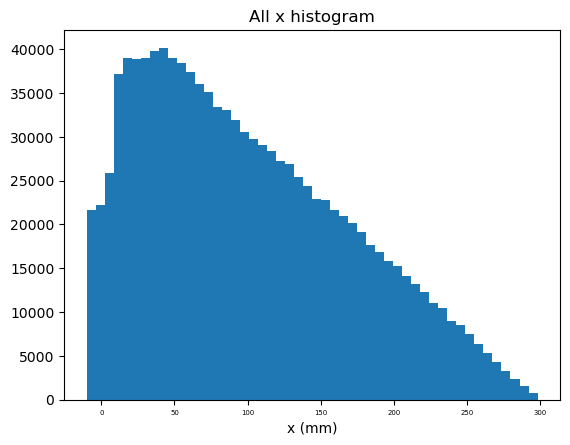

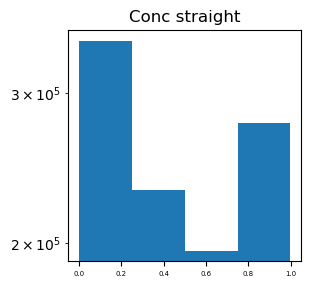

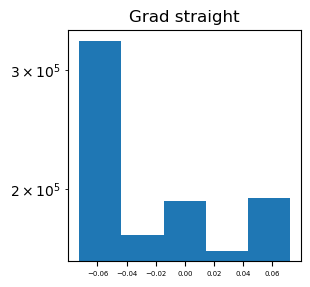

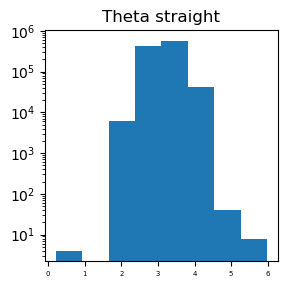

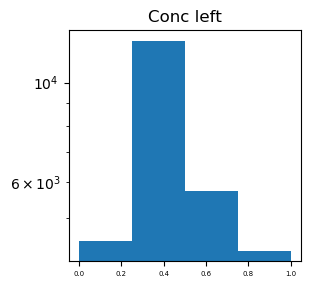

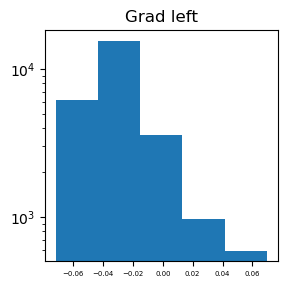

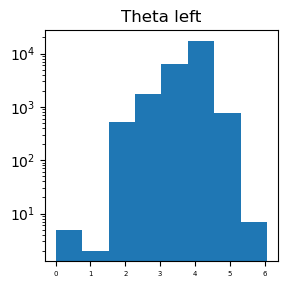

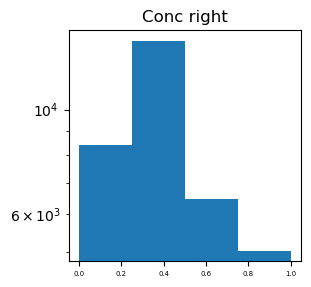

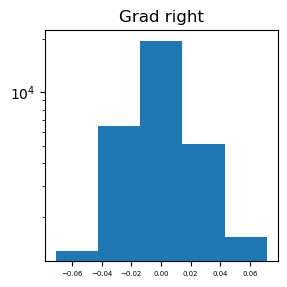

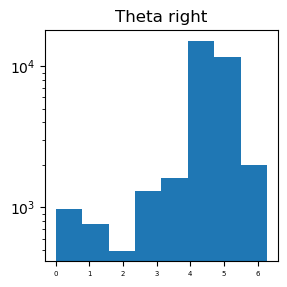

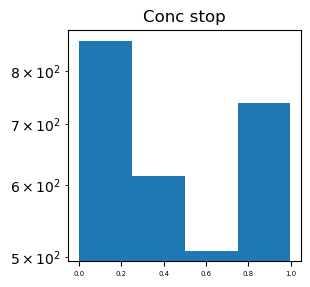

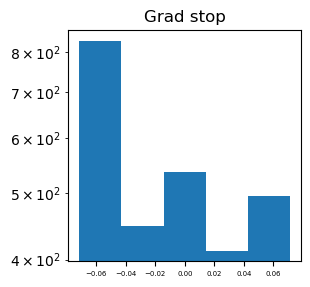

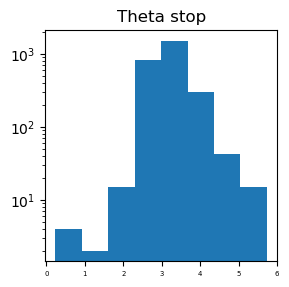

In [95]:
conc = all_dat[:,0]
grad = all_dat[:,1]
#hrc = all_dat[:,2]
theta = all_dat[:,3]
x = all_dat[:,5]
y = all_dat[:,6]


plt.hist(grad)
plt.title('All gradient histogram')
plt.xlabel("gradient (au)")
plt.show()


plt.hist(y, bins = 50)
plt.yscale('log')
plt.title("All y histogram")
plt.xlabel('y (mm)')
plt.show()

print(np.mean(y))
print(np.std(y))

plt.hist(x, bins = 50)
plt.title("All x histogram")
plt.xlabel('x (mm)')
plt.show()


conc_straight = conc[actions==0]
conc_left = conc[actions==1]
conc_right = conc[actions==2]
conc_stop = conc[actions==3]

grad_straight = grad[actions==0]
grad_left = grad[actions==1]
grad_right = grad[actions==2]
grad_stop = grad[actions==3]

#hrc_straight = hrc[actions==0]
#hrc_left = hrc[actions==1]
#hrc_right = hrc[actions==2]
#hrc_stop = hrc[actions==3]

theta_straight = theta[actions==0]
theta_left = theta[actions==1]
theta_right = theta[actions==2]
theta_stop = theta[actions==3]


plt.figure(figsize=(3,3))
plt.hist(conc_straight, bins = 4)
plt.yscale('log')
plt.title('Conc straight')
plt.show()

plt.figure(figsize=(3,3))
plt.hist(grad_straight, bins = 5)
plt.yscale('log')
plt.title('Grad straight')
plt.show()

"""
plt.figure(figsize=(3,3))
plt.hist(hrc_straight, bins = 5)
plt.title("HRC Straight")
plt.yscale('log')
plt.show()
"""

plt.figure(figsize=(3,3))
plt.hist(theta_straight, bins = 8)
plt.yscale('log')
plt.title("Theta straight")
plt.show()



plt.figure(figsize=(3,3))
plt.hist(conc_left, bins = 4)
plt.yscale('log')
plt.title('Conc left')
plt.show()

plt.figure(figsize=(3,3))
plt.hist(grad_left, bins = 5)
plt.yscale('log')
plt.title('Grad left')
plt.show()

"""
plt.figure(figsize=(3,3))
plt.hist(hrc_left, bins = 5)
plt.yscale('log')
plt.title("HRC left")
plt.show()
"""

plt.figure(figsize=(3,3))
plt.hist(theta_left, bins = 8)
plt.yscale('log')
plt.title("Theta left")
plt.show()



plt.figure(figsize=(3,3))
plt.hist(conc_right, bins = 4)
plt.yscale('log')
plt.title('Conc right')
plt.show()

plt.figure(figsize=(3,3))
plt.hist(grad_right, bins = 5)
plt.yscale('log')
plt.title('Grad right')
plt.show()

"""
plt.figure(figsize=(3,3))
plt.hist(hrc_right, bins = 5)
plt.yscale('log')
plt.title("HRC right")
plt.show()
"""

plt.figure(figsize=(3,3))
plt.hist(theta_right, bins = 8)
plt.yscale('log')
plt.title("Theta right")
plt.show()


plt.figure(figsize=(3,3))
plt.hist(conc_stop, bins = 4)
plt.yscale('log')
plt.title('Conc stop')
plt.show()

plt.figure(figsize=(3,3))
plt.hist(grad_stop, bins = 5)
plt.yscale('log')
plt.title('Grad stop')
plt.show()

"""
plt.figure(figsize=(3,3))
plt.hist(hrc_stop, bins = 5)
plt.yscale('log')
plt.title("HRC stop")
plt.show()
"""

plt.figure(figsize=(3,3))
plt.hist(theta_stop, bins = 8)
plt.yscale('log')
plt.title("Theta stop")
plt.show()